## Upwind and Lax-Wendroff Schemes for solving Partial Differential Equations

A homework from the ACM30220 module

Firstly, we must import the relevant packages. We will need numpy to enable the use of arrays while implementing the numerical schemes. We will also need matplotlib in order to produce plots of the schemes at various time intervals and allow us to graphically compare the analytical and numerical solutions.

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Question 1 asks to write a general solver to the upwind and lax-wendroff schemes which takes the following inputs:
1. u_old - real array of length N: discrete function evaluations of u at grid points
2. T_start - real number: Start time of simulation
3. T_end - real number: Final time of simulation
4. v - real number: v is the wind
5. delta_x - real number: grid spacing
6. delta_t - real number: time step



## Write a general solver of the form write a solver of the form;
$$
u_{new} = upwind(u_{old},T , v(x, t),∆x, ∆t,...)
$$

The  formula for the upwind method for pde's in the form $\frac{\partial u}{\partial t} + v(x,t)\frac{\partial u}{\partial x} = g(x,t)$ depends on whether $v(x,y)$ is positive or negative and so I implemented a simple if, else statement to allow both of these cases to be handled.

For $v(x,y)<0$ we use a forward in time forward in space approach and thus we run into an indexing error when we try to access an element outside the upper index which I also had to implement an if, else statement to handle. Similarly, for $v(x,y)\geq 0$ I had to allow for the case where the code tried to acces the index outside the lower bound.

(By implementing the indexing in the manner below I have allowed for periodic boundary conditions and so a lot of the work in Question 4 is done here already.)

In [2]:
def upwind(u_old,T_start,T_end,v,delta_x,delta_t):
    """
    INPUT
    u_old = N dimentional array
    T_start = float
    T_end = float
    v = float
    delta_x = float (= L/float(N) in next block of code given) (grid spacing)
    delta_t = float (time step)
    
    OUTPUT
    u_new = an N x 4 dimentional array with a column for each step time and a row for each step in space.
    """
    # get the length of the u_old array to be used for looping
    num_dof = len(u_old)
    # get the number of time steps to be used for looping
    num_tsteps = int(numpy.ceil((T_end-T_start)/delta_t))
    # define mu to make the formula shorter and easier to work with when implementing below
    mu = delta_t / delta_x
    #Create temporary arrays of the shape u_old to save results to during the calculations
    u_tmp = u_old.copy()
    u_new = u_old.copy()
            

    if v<0:
        for k in range(num_tsteps):
        # For every delta_t do this
        # Loop through all grid points
            for l in range(num_dof):
                # Due to indexing restraints an if statement is needed to take into account periodic boundary conditions
                # By doing this here the solver satisfies the periodic boundary conditions in Q4 also
                if (l==num_dof-1):
                    u_new[l] = u_tmp[l] - mu * v * (u_tmp[0] - u_tmp[l])
                else:
                    u_new[l] = u_tmp[l] - mu * v * (u_tmp[l+1] - u_tmp[l])

            # Update the temporary array        
            u_tmp = u_new.copy()
    
    else:
        for k in range(num_tsteps):
        # For every delta_t do this
        # Loop through all grid points ie. for each delta_x
            for l in range(num_dof):
                #If you are at the right end of your interval, use this to take into account the periodic boundary conditions
                if (l==0):
                    u_new[l] = u_tmp[l] - mu * v * (u_tmp[l] - u_tmp[(num_dof-1)])
                else:
                    u_new[l] = u_tmp[l] - mu * v * (u_tmp[l] - u_tmp[l-1])

            # Update your temporary array        
            u_tmp = u_new.copy()
        
    return u_new

# Lax Wendroff

In the lax-wendroff implementation, the formula does not change depending on $v(x,y)$ however both of the indexing issues I encountered in the upwind method I also encountered in the lax-wendroff method. This was because the formula for lax-wendroff relies on both the previous and following index and thus I had to have two if,else statements to prevent indexing errors

(By implementing the indexing in the manner below I have allowed for periodic boundary conditions and so a lot of the work in Question 4 is done here already.)

In [3]:
def lax_wendroff(u_old,T_start,T_end,v,delta_x,delta_t):
    """
    u_old = N dimensional array
    T_start = float
    T_end = float
    v = float
    delta_x = float (= L/float(N) in next block of code given)
    delta_t = float
    
    OUTPUT
    u_new = an N x 4 dimentional array with a column for each step time and a row for each step in space.
    """
    
    # get the len of the u_old array to be used for looping
    num_dof = len(u_old)
    # get the number of t steps to be used for looping
    num_tsteps = int(numpy.ceil((T_end-T_start)/delta_t))
    # define mu to make the formula shorter and easier to work with when implementing below
    mu = delta_t / delta_x
    #Create temporary arrays of the shape u_old to save results to during the calculations
    u_tmp = u_old.copy()
    u_new = u_old.copy()

    for k in range(num_tsteps):
    # For every delta_t do this
    # Loop through all grid points
        for l in range(num_dof):
            # Due to indexing restraints an if statement is needed to take into account periodic boundary conditions
            # By doing this here the solver satisfies the periodic boundary conditions in Q4 also
            # The lax wendroff scheme uses a central difference, ie. goes forwards and backward
            # For this reason there are two cases for indexing error and so an extra elif was needed
            # l==num_dof-1  --> [l+1] -> [0]
            if (l==num_dof-1):
                u_new[l] = u_tmp[l] - 0.5 * mu * v * (u_tmp[0] - u_tmp[l-1]) + 0.5 * (v**2) * (mu**2) *(u_tmp[0]-2*u_tmp[l]+u_tmp[l-1])
            # l==0  --> [l-1] -> [(num_dof-1)]
            elif l==0:
                u_new[l] = u_tmp[l] - 0.5 * mu * v * (u_tmp[l+1] - u_tmp[(num_dof-1)]) + 0.5 * (v**2) * (mu**2) *(u_tmp[l+1]-2*u_tmp[l]+u_tmp[(num_dof-1)])
            else:
                u_new[l] = u_tmp[l] - 0.5 * mu * v * (u_tmp[l+1] - u_tmp[l-1]) + 0.5 * (v**2) * (mu**2) *(u_tmp[l+1]-2*u_tmp[l]+u_tmp[l-1])

        # Update your temporary array        
        u_tmp = u_new.copy()
        
    return u_new

# 2. (40 Points) Use your solvers to solve the problem with data and compare them to the analytical solution. Plot snapshots of the numerical and analytical solution at times $t \in \{0, 0.25, 0.5, 1.0\}$ and compute the L2-error $ E_{l_2}$ at those time steps, i.e. the quantity defined by:

For question 2, I firstly defined an error function which would compute the L2-error for inputs:
1. function1  - real array of length N: discrete function evaluations of function1 at grid points
2. function2  - real array of length N: discrete function evaluations of function2 at grid points
3. delta_x    - real number: grid spacing

In this case the function1 is the array corresponding to the analytical solution at time $t$. Function2 is the array corresponding to the numerical solution at time $t$. Finally, delta_x is the step size taken in x.

In [4]:
"""
Define error function to be used for each part
"""
def error(function1,function2,delta_x):
    """
    INPUT
    function1  - real array of length N: discrete function evaluations of function1 at grid points
    function2  - real array of length N: discrete function evaluations of function2 at grid points
    delta_x    - real number: grid spacing
    
    OUTPUT
    floating point number representing L2 error
    """
    # Initialize output variable
    ans = 0.0
    
    # number of grid points
    N   = len(function1)
    
    # Loop over all the points
    for k in range(N):
        ans += (function1[k]-function2[k])**2 * delta_x
    
    return numpy.sqrt(ans)

## (a)   $T =1, L=1.5, v(x,t)=1; g(x,t)=0; h(x)=exp(−10(4x−1)^2)$
### i) Upwind Method

In [5]:
# Test script for the upwind method
T_start = 0.0
T_25 = 0.25
T_50 = 0.5
T_end = 1.0

L = 1.5
v = 1.0

# Define the initial condition
def IC(x,t):
    return numpy.exp(-10*(4*(x-t)-1)**2)

# Number of grid points (ie. number of space partitions)
N = 200

# Define array of all grid points
x = numpy.linspace(0,L,N)

# Use the parameters to determine the grid spacing and set time step
delta_x = L/float(N)
delta_t = 0.005

# Initialize two arrays: One for the analytical solution and one for the numerical
# Here, the first dimension gives you the number of grid points and the second is 4
# It is 4 to create a column for each time step, ie [0,0.25,0.5,1]

u_ana_up_a    = numpy.zeros((N,4))
u_upwind_a = numpy.zeros((N,4))

# Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_a and u_upwind_a
# The analatical and numerical solution are identical at t=0
u_ana_up_a[:,0]    = IC(x,T_start)
u_upwind_a[:,0] = IC(x,T_start)

# The analytical solution at the remaining time steps are saved in the relevant columns of the u_analytical array
u_ana_up_a[:,1]    = IC(x,T_25)
u_ana_up_a[:,2]    = IC(x,T_50)
u_ana_up_a[:,3]    = IC(x,T_end)

# Run the upwind function and save the results to the relevent index in the array
u_upwind_a[:,1] = upwind(u_upwind_a[:,0],T_start,T_25,v,delta_x,delta_t)
u_upwind_a[:,2] = upwind(u_upwind_a[:,0],T_start,T_50,v,delta_x,delta_t)
u_upwind_a[:,3] = upwind(u_upwind_a[:,0],T_start,T_end,v,delta_x,delta_t)

At time=0 the error=0.0
At time=0.25 the error=0.024974672463386628
At time=0.5 the error=0.04513650333376531
At time=1 the error=0.07605308242464552


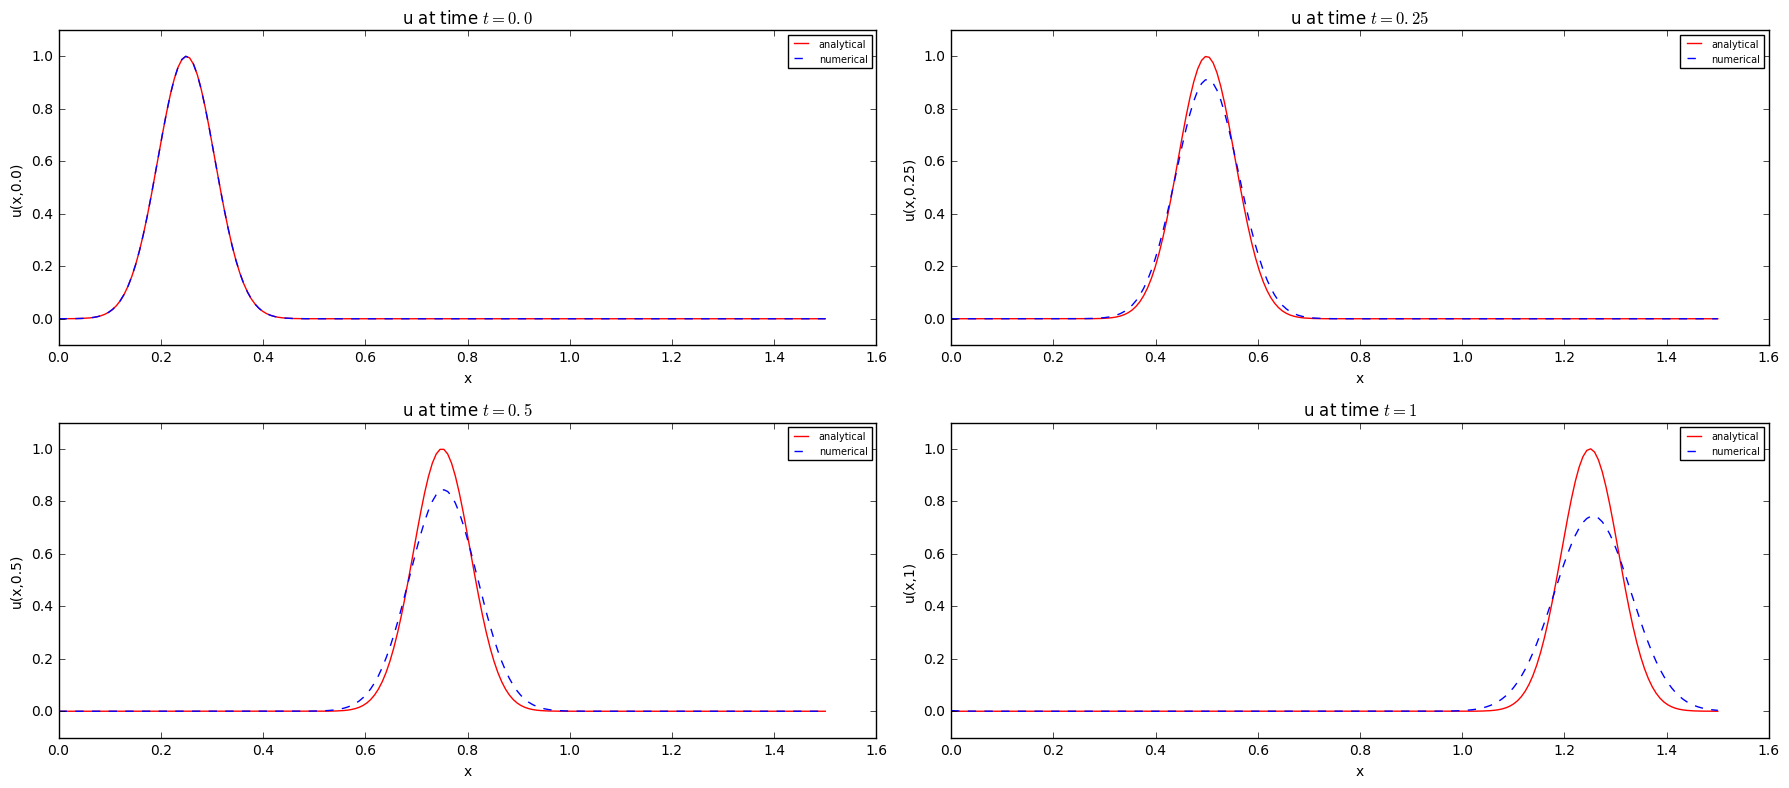

In [6]:
fig = plt.figure(1)
fig.set_figwidth(3 * fig.get_figwidth())
fig.set_figheight(2 * fig.get_figheight())

for i in range(4):
    subplt_num = 221+i
    if i==3:
        time_val = 1
    else:
        time_val = i/4
    plt.subplot(subplt_num)
    plt.tight_layout()
    plt.plot(x,u_ana_up_a[:,i],'r',label="analytical")
    plt.plot(x,u_upwind_a[:,i],'b--', label="numerical",linewidth=1)
    plt.xlabel("x")
    plt.ylabel("u(x,{})".format(time_val))
    plt.title("u at time $t={}$".format(time_val))
    plt.legend(fontsize=7)
    plt.ylim(-0.1,1.1)
    
# at times t ∈ {0, 0.25, 0.5, 1.0} compute the L2-error at those time steps
# Error function defined above
# Firstly for the initial time = 0
err_up_a_list = []
err_up_a_0 = error(u_ana_up_a[:,0],u_upwind_a[:,0],delta_x)
err_up_a_list.append(err_up_a_0)
# t = 0.25
err_up_a_025 = error(u_ana_up_a[:,1],u_upwind_a[:,1],delta_x)
err_up_a_list.append(err_up_a_025)
# t = 0.5
err_up_a_050 = error(u_ana_up_a[:,2],u_upwind_a[:,2],delta_x)
err_up_a_list.append(err_up_a_050)
# t = 1
err_up_a_1 = error(u_ana_up_a[:,3],u_upwind_a[:,3],delta_x)
err_up_a_list.append(err_up_a_1)

t_list = [0,0.25,0.5,1]

for i in range(len(err_up_a_list)):
    print('At time={} the error={}'.format(t_list[i],err_up_a_list[i]))

In the plots above it is clear that the numerical solution becomes less accurate the further away from time 0 it goes. At time $t=0.25$ the numerical approximation is very close to the analytical solution, however, becomes less accurate at time $t=0.5$ and then is least accurate at $t=1$.

### ii) Lax Wendroff Method

In [7]:
T_start = 0.0
T_25 = 0.25
T_50 = 0.5
T_end = 1.0

L = 1.5
v = 1.0

# Define the initial condition
def IC(x,t):
    return numpy.exp(-10*(4*(x-t)-1)**2)

# Number of grid points
N = 200

# Define array of all grid points
x = numpy.linspace(0,L,N)

# Use the parameters to determine the grid spacing and set time step
delta_x = L/float(N)
delta_t = 0.005

# Initialize two arrays: One for the analytical solution and one for the numerical
# Here, the first dimension gives you the number of grid points and the second is 4
# It is 4 to create a column for each time step, ie [0,0.25,0.5,1]
u_ana_lax_a    = numpy.zeros((N,4))
u_lax_a = numpy.zeros((N,4))

# Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_a and u_upwind_a
# The analatical and numerical solution are identical at t=0
u_ana_lax_a[:,0]    = IC(x,T_start)
u_lax_a[:,0] = IC(x,T_start)

# The analytical solution at the remaining time steps are saved in the relevant columns of the u_analytical array
u_ana_lax_a[:,1]    = IC(x,T_25)
u_ana_lax_a[:,2]    = IC(x,T_50)
u_ana_lax_a[:,3]    = IC(x,T_end)

# Run the upwind function and save the results to the relevent index in the array depending on the time step
u_lax_a[:,1] = lax_wendroff(u_lax_a[:,0],T_start,T_25,v,delta_x,delta_t)
u_lax_a[:,2] = lax_wendroff(u_lax_a[:,0],T_start,T_50,v,delta_x,delta_t)
u_lax_a[:,3] = lax_wendroff(u_lax_a[:,0],T_start,T_end,v,delta_x,delta_t)


At time=0 the error=0.0
At time=0.25 the error=0.0032312903551171054
At time=0.5 the error=0.006455968773474805
At time=1 the error=0.012884866282808294


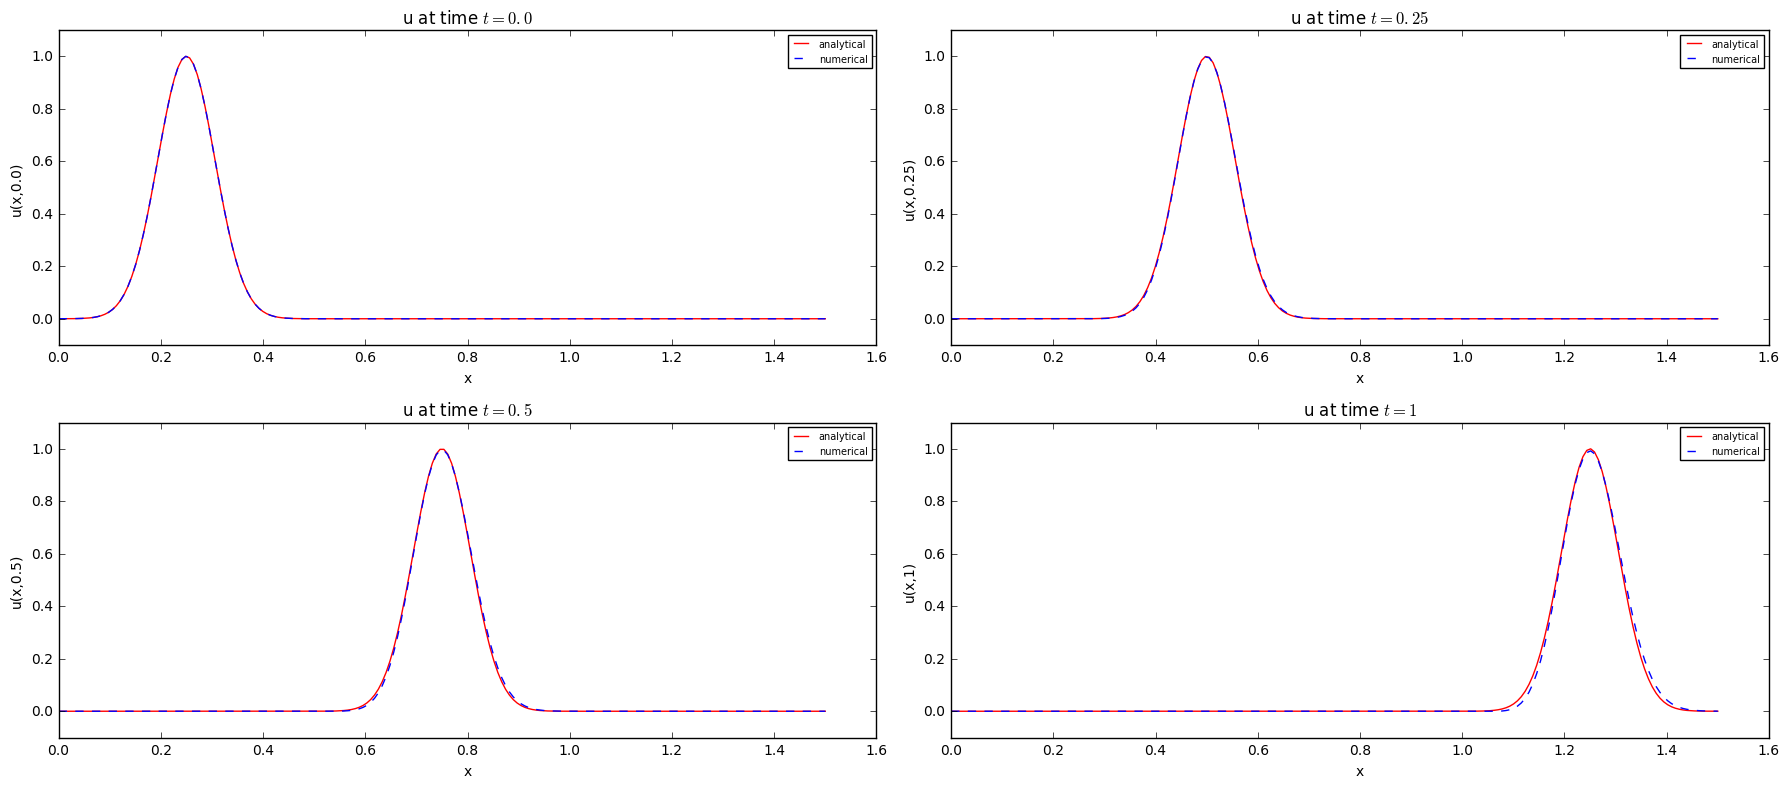

In [8]:
fig = plt.figure(1)
fig.set_figwidth(3 * fig.get_figwidth())
fig.set_figheight(2 * fig.get_figheight())

for i in range(4):
    subplt_num = 221+i
    if i==3:
        time_val = 1
    else:
        time_val = i/4
    plt.subplot(subplt_num)
    plt.tight_layout()
    plt.plot(x,u_ana_lax_a[:,i],'r',label="analytical")
    plt.plot(x,u_lax_a[:,i],'b--', label="numerical",linewidth=1)
    plt.xlabel("x")
    plt.ylabel("u(x,{})".format(time_val))
    plt.title("u at time $t={}$".format(time_val))
    plt.legend(fontsize=7)
    plt.ylim(-0.1,1.1)
    
# at times t ∈ {0, 0.25, 0.5, 1.0} compute the L2-error El2 at those time steps
# function defined above
# t = 0
err_lax_a_list = []
err_lax_a_0 = error(u_ana_lax_a[:,0],u_lax_a[:,0],delta_x)
err_lax_a_list.append(err_lax_a_0)
# t = 0.25
err_lax_a_025 = error(u_ana_lax_a[:,1],u_lax_a[:,1],delta_x)
err_lax_a_list.append(err_lax_a_025)
# t = 0.5
err_lax_a_050 = error(u_ana_lax_a[:,2],u_lax_a[:,2],delta_x)
err_lax_a_list.append(err_lax_a_050)
# t = 1
err_lax_a_1 = error(u_ana_lax_a[:,3],u_lax_a[:,3],delta_x)
err_lax_a_list.append(err_lax_a_1)

t_list = [0,0.25,0.5,1]

for i in range(len(err_lax_a_list)):
    print('At time={} the error={}'.format(t_list[i],err_lax_a_list[i]))


In the lax-wendroff case for part (a) the numerical solution seems to track the analytical solution almost perfects for all $t\in [0,0.25,0.5,1]$. By looking at the $L_2$ error readouts however, we can see that the error is in fact increasing with time.

### iii) Compare Upwind and Lax-Wendroff

In [9]:
print('Upwind Scheme')
for i in range(len(err_up_a_list)):
    print('At time={} the error={}'.format(t_list[i],err_up_a_list[i]))
print('----------------------')
print('Lax-Wendroff Scheme')
for i in range(len(err_lax_a_list)):
    print('At time={} the error={}'.format(t_list[i],err_lax_a_list[i]))

Upwind Scheme
At time=0 the error=0.0
At time=0.25 the error=0.024974672463386628
At time=0.5 the error=0.04513650333376531
At time=1 the error=0.07605308242464552
----------------------
Lax-Wendroff Scheme
At time=0 the error=0.0
At time=0.25 the error=0.0032312903551171054
At time=0.5 the error=0.006455968773474805
At time=1 the error=0.012884866282808294


Having kept the $\Delta x$ and $\Delta t$ quantities the same for both schemes the comparison is fair and from the numbers it is clear to see that the lax-wendroff scheme performed more accurately than the upwind method at all time values.

## b) $$
T =1,L=1.5, v(x,t)=1; g(x,t)=0; h(x)=1 0.1≤x≤0.3 0 otherwise.
$$


In [10]:

T_start = 0.0
T_25 = 0.25
T_50 = 0.5
T_end = 1.0

L = 1.5
v = 1.0

# Define the initial condition
def IC(x,t):
    new=x-t
    for i in range(len(new)):
        if new[i]<0.1:
            new[i]=0
        elif new[i]>0.3:
            new[i]=0
        else:
            new[i]=1
    return new

# Number of grid points
N = 200

# Define array of all grid points
x = numpy.linspace(0,L,N)

# Use the parameters to determine the grid spacing and set time step
delta_x = L/float(N)
delta_t = 0.005

# Initialize two arrays: One for the analytical solution and one for the numerical
# Here, the first dimension gives you the number of grid points and the second is 4
# It is 4 to create a column for each time step, ie [0,0.25,0.5,1]

u_ana_up_b    = numpy.zeros((N,4))
u_upwind_b = numpy.zeros((N,4))

# Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_b and u_upwind_b
u_ana_up_b[:,0]    = IC(x,T_start)
u_upwind_b[:,0] = IC(x,T_start)

# The analytical solution at the remaining time steps are saved in the relevant columns of the u_analytical array
u_ana_up_b[:,1]    = IC(x,T_25)
u_ana_up_b[:,2]    = IC(x,T_50)
u_ana_up_b[:,3]    = IC(x,T_end)

# Run the upwind function and save the results to the relevent index in the array
u_upwind_b[:,1] = upwind(u_upwind_b[:,0],T_start,T_25,v,delta_x,delta_t)
u_upwind_b[:,2] = upwind(u_upwind_b[:,0],T_start,T_50,v,delta_x,delta_t)
u_upwind_b[:,3] = upwind(u_upwind_b[:,0],T_start,T_end,v,delta_x,delta_t)

At time=0 the error=0.0
At time=0.25 the error=0.1086652579679355
At time=0.5 the error=0.1296129348803294
At time=1 the error=0.1560291670118575


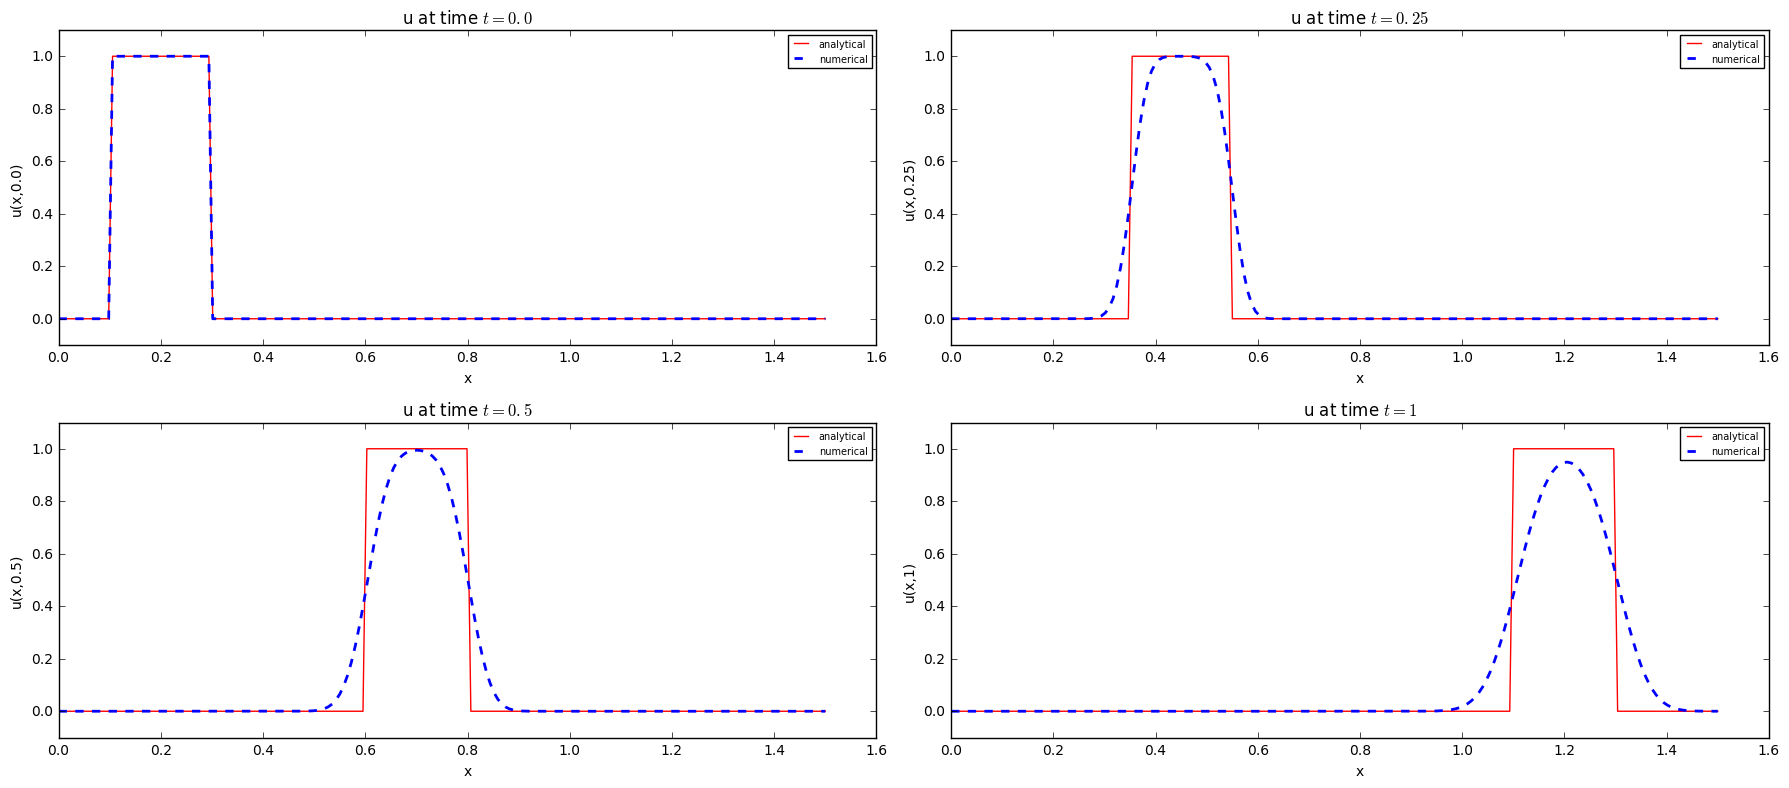

In [11]:
fig = plt.figure(1)
fig.set_figwidth(3 * fig.get_figwidth())
fig.set_figheight(2 * fig.get_figheight())

for i in range(4):
    subplt_num = 221+i
    if i==3:
        time_val = 1
    else:
        time_val = i/4
    plt.subplot(subplt_num)
    plt.tight_layout()
    plt.plot(x,u_ana_up_b[:,i],'r',label="analytical")
    plt.plot(x,u_upwind_b[:,i],'b--', label="numerical",linewidth=2)
    plt.xlabel("x")
    plt.ylabel("u(x,{})".format(time_val))
    plt.title("u at time $t={}$".format(time_val))
    plt.legend(fontsize=7)
    plt.ylim(-0.1,1.1)
    
# at times t ∈ {0, 0.25, 0.5, 1.0} compute the L2-error El2 at those time steps
# function defined above
#At t=0
err_up_b_list = []
err_up_b_0 = error(u_ana_up_b[:,0],u_upwind_b[:,0],delta_x)
err_up_b_list.append(err_up_b_0)
#At t=.25
err_up_b_025 = error(u_ana_up_b[:,1],u_upwind_b[:,1],delta_x)
err_up_b_list.append(err_up_b_025)
#At t=.5
err_up_b_050 = error(u_ana_up_b[:,2],u_upwind_b[:,2],delta_x)
err_up_b_list.append(err_up_b_050)
#At t=1
err_up_b_1 = error(u_ana_up_b[:,3],u_upwind_b[:,3],delta_x)
err_up_b_list.append(err_up_b_1)

t_list = [0,0.25,0.5,1]

for i in range(len(err_up_b_list)):
    print('At time={} the error={}'.format(t_list[i],err_up_b_list[i]))



Similarly to part $(a)$ the scheme becomes less accurate as $t$ moves further away from $0$. This is evident from both the graphs and the error values displayed above.

### ii) Lax Wendroff Method

In [12]:
T_start = 0.0
T_25 = 0.25
T_50 = 0.5
T_end = 1.0

L = 1.5
v = 1.0

# Define the initial condition
def IC(x,t):
    new=x-t
    for i in range(len(new)):
        if new[i]<0.1:
            new[i]=0
        elif new[i]>0.3:
            new[i]=0
        else:
            new[i]=1
    return new

# Number of grid points
N = 200

# Define array of all grid points
x = numpy.linspace(0,L,N)

# Use the parameters to determine the grid spacing and set time step
delta_x = L/float(N)
delta_t = 0.005

# Initialize two arrays: One for the analytical solution and one for the numerical
# Here, the first dimension gives you the number of grid points and the second is 4
# It is 4 to create a column for each time step, ie [0,0.25,0.5,1]
u_ana_lax_b    = numpy.zeros((N,4))
u_lax_b = numpy.zeros((N,4))

# Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_a and u_upwind_a
u_ana_lax_b[:,0]    = IC(x,T_start)
u_lax_b[:,0] = IC(x,T_start)

# The analytical solution at the remaining time steps are saved in the relevant columns of the u_analytical array

u_ana_lax_b[:,1]    = IC(x,T_25)
u_ana_lax_b[:,2]    = IC(x,T_50)
u_ana_lax_b[:,3]    = IC(x,T_end)

# Run the upwind function and save the results to the relevent index in the array
u_lax_b[:,1] = lax_wendroff(u_lax_b[:,0],T_start,T_25,v,delta_x,delta_t)
u_lax_b[:,2] = lax_wendroff(u_lax_b[:,0],T_start,T_50,v,delta_x,delta_t)
u_lax_b[:,3] = lax_wendroff(u_lax_b[:,0],T_start,T_end,v,delta_x,delta_t)

At time=0 the error=0.0
At time=0.25 the error=0.08595593663324676
At time=0.5 the error=0.10582137763507746
At time=1 the error=0.11372464715713625


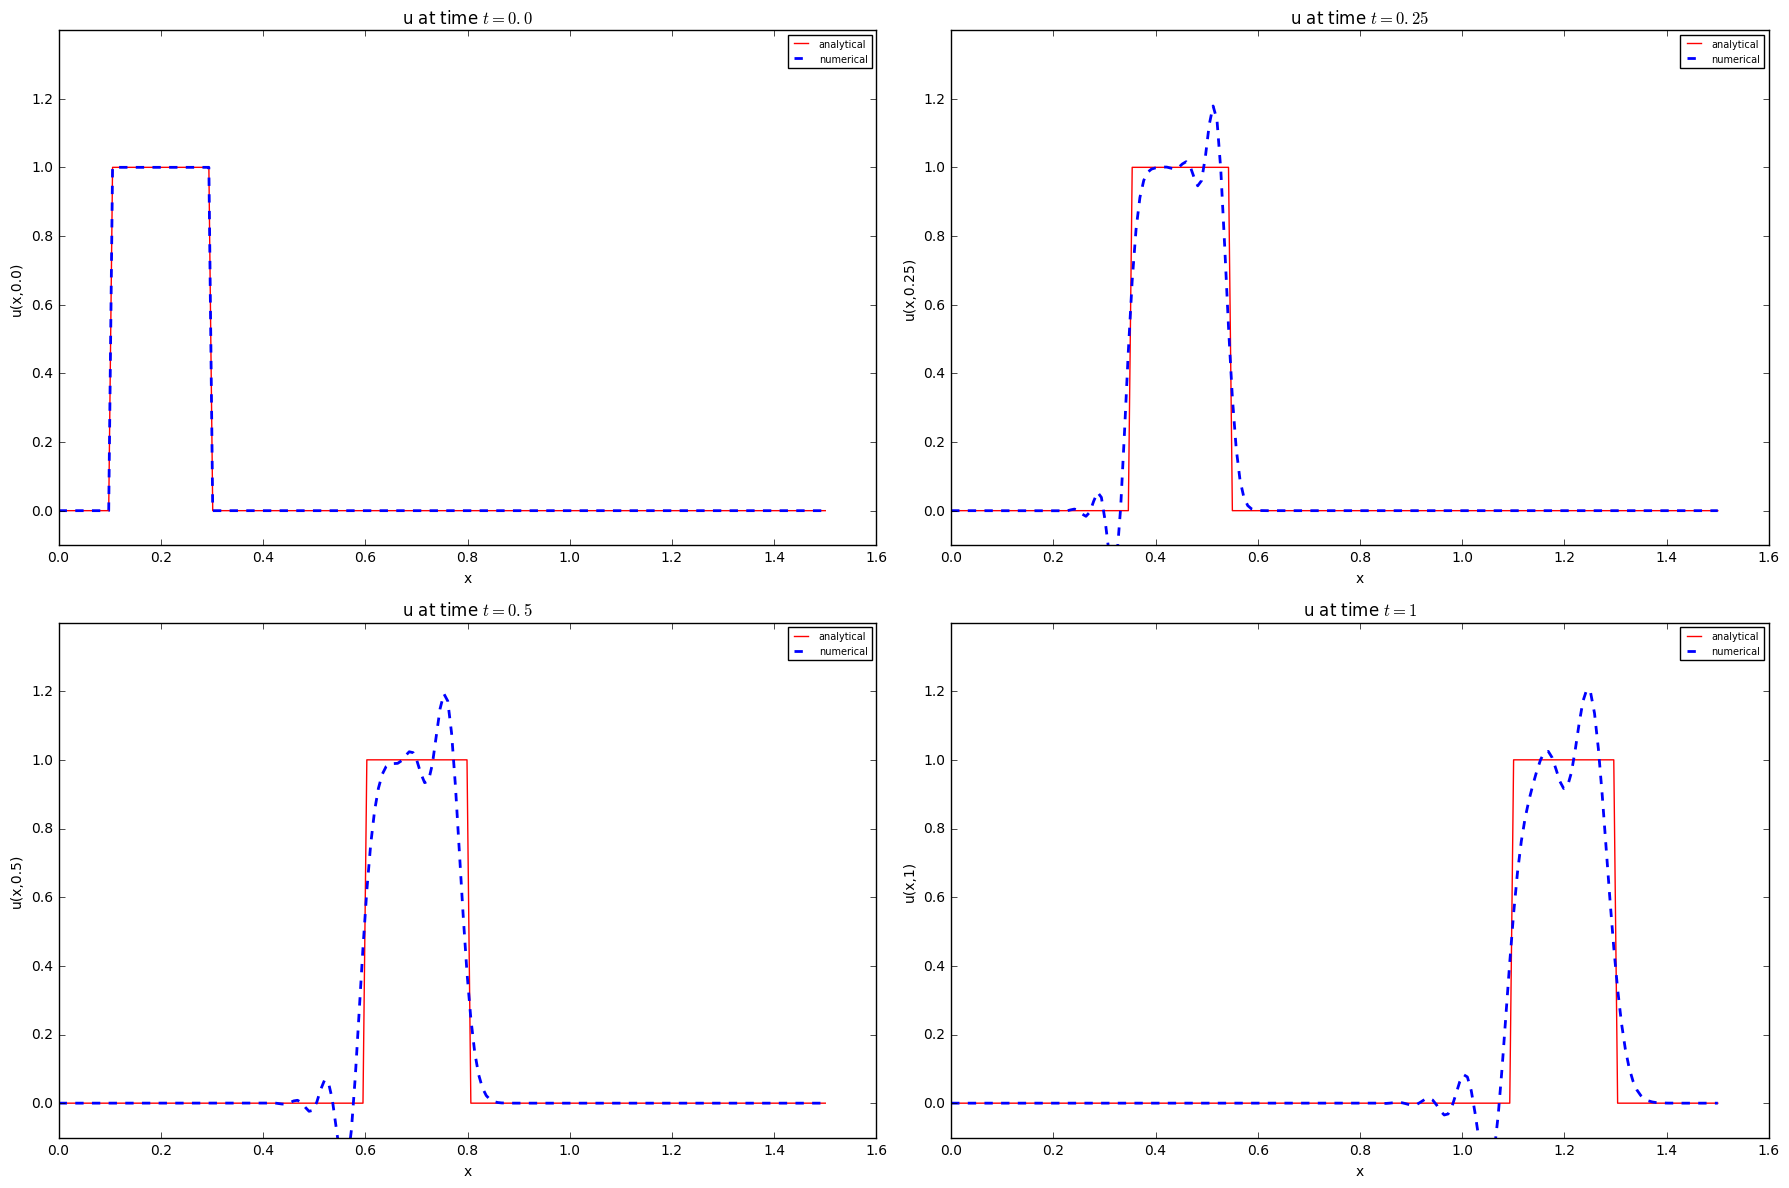

In [13]:
fig = plt.figure(1)
fig.set_figwidth(3 * fig.get_figwidth())
fig.set_figheight(3 * fig.get_figheight())

for i in range(4):
    subplt_num = 221+i
    if i==3:
        time_val = 1
    else:
        time_val = i/4
    plt.subplot(subplt_num)
    plt.tight_layout()
    plt.plot(x,u_ana_lax_b[:,i],'r',label="analytical")
    plt.plot(x,u_lax_b[:,i],'b--', label="numerical",linewidth=2)
    plt.xlabel("x")
    plt.ylabel("u(x,{})".format(time_val))
    plt.title("u at time $t={}$".format(time_val))
    plt.legend(fontsize=7)
    plt.ylim(-0.1,1.4)
    
# at times t ∈ {0, 0.25, 0.5, 1.0} compute the L2-error El2 at those time steps
# function defined above
#At t=0
err_lax_b_list = []
err_lax_b_0 = error(u_ana_lax_b[:,0],u_lax_b[:,0],delta_x)
err_lax_b_list.append(err_lax_b_0)
#At t=.25
err_lax_b_025 = error(u_ana_lax_b[:,1],u_lax_b[:,1],delta_x)
err_lax_b_list.append(err_lax_b_025)
#At t=.5
err_lax_b_050 = error(u_ana_lax_b[:,2],u_lax_b[:,2],delta_x)
err_lax_b_list.append(err_lax_b_050)
#At t=1
err_lax_b_1 = error(u_ana_lax_b[:,3],u_lax_b[:,3],delta_x)
err_lax_b_list.append(err_lax_b_1)

t_list = [0,0.25,0.5,1]

for i in range(len(err_lax_b_list)):
    print('At time={} the error={}'.format(t_list[i],err_lax_b_list[i]))



From the above plots it is hard to notice a difference in the error as time goes on for the lax-wendroff implementation. However, the error values show a steadily increasing error as $t$ ranges from $0$ to $1$.

### Comparison of errors

In [14]:
print('Upwind Scheme')
for i in range(len(err_up_b_list)):
    print('At time={} the error={}'.format(t_list[i],err_up_a_list[i]))
print('----------------------')
print('Lax-Wendroff Scheme')
for i in range(len(err_lax_b_list)):
    print('At time={} the error={}'.format(t_list[i],err_lax_a_list[i]))

Upwind Scheme
At time=0 the error=0.0
At time=0.25 the error=0.024974672463386628
At time=0.5 the error=0.04513650333376531
At time=1 the error=0.07605308242464552
----------------------
Lax-Wendroff Scheme
At time=0 the error=0.0
At time=0.25 the error=0.0032312903551171054
At time=0.5 the error=0.006455968773474805
At time=1 the error=0.012884866282808294


For example $(b)$ the graphs are a more telling indicator of the superior performance of the lax-wendroff scheme than the numerical error values however both convey the same message, that the lax-wendroff scheme produces a more accurate numerical approximation.

# Q3

## Space convergence for Upwind and Lax-Wendroff Schemes using example (a)

In the following block of code I looped through a range of values for $N$. Since $\Delta x=\frac{L}{N}$, by iterating through different values of $N$ I was able to change the $\Delta x$ value and thus test the convergence in space of each scheme.

I then plotted the results on a bi-logrithmic plot as required

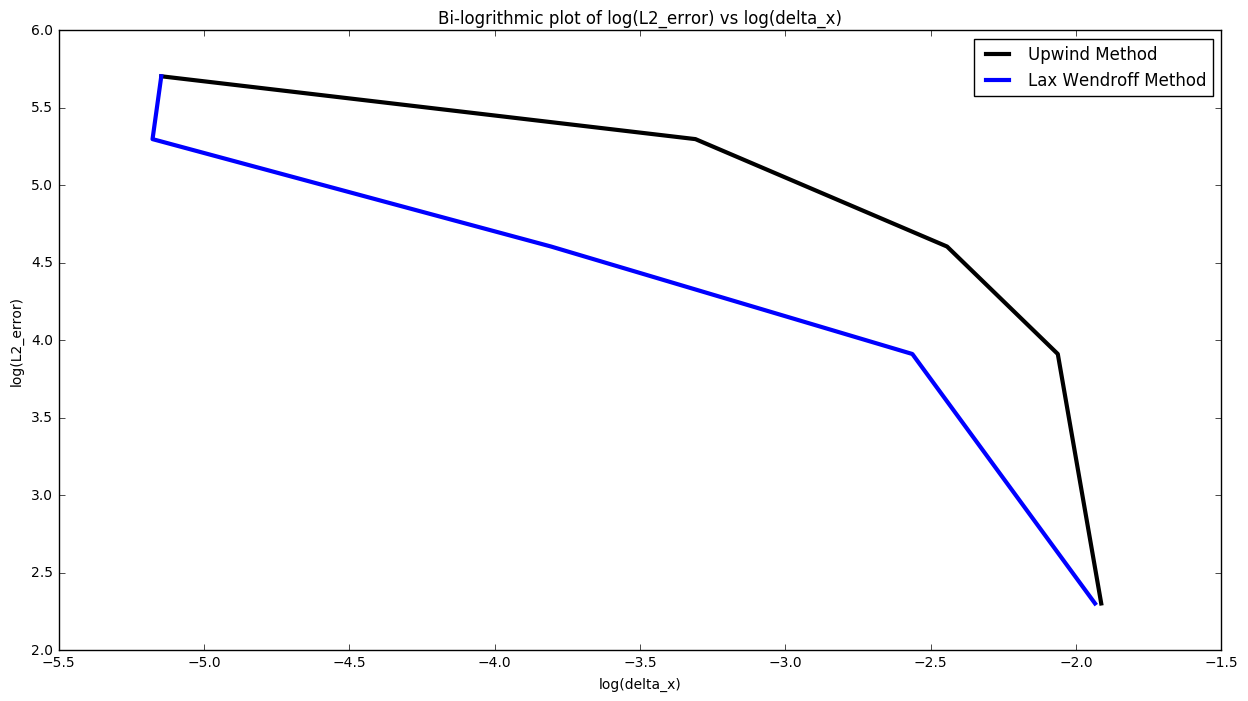

In [15]:
#Create a list of N values to loop through
divisions = [10,50,100,200,300]

# Initialise two lists to store errors in
up_error_list = []
lax_error_list =[]
for N in divisions:
    iteration=1
    T_start = 0.0
    T_25 = 0.25
    T_50 = 0.5
    T_end = 1.0

    L = 1.5
    v = 1.0

    # Define the initial condition
    def IC(x,t):
        return numpy.exp(-10*(4*(x-t)-1)**2)

    # We dont need the usual line defining N since it is defined in our loop
    # ie. N = 200 is not necessary here

    # Define array of all grid points
    x = numpy.linspace(0,L,N)

    # Use the parameters to determine the grid spacing and set time step
    delta_x = L/float(N)
    delta_t = 0.005
    
    #print(delta_x/delta_t)
    # Initialize two arrays: One for the analytical solution and one for the numerical
    # Here, the first dimension gives you the number of grid points and the second is 4
    # It is 4 to create a column for each time step, ie [0,0.25,0.5,1]

    u_ana_up_a = numpy.zeros((N,4))
    u_upwind_a = numpy.zeros((N,4))

    # Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_a and u_upwind_a
    u_ana_up_a[:,0]    = IC(x,T_start)
    u_upwind_a[:,0] = IC(x,T_start)

    # The analytical solution at the remaining time steps are saved in the relevant columns of the u_analytical array

    u_ana_up_a[:,1]    = IC(x,T_25)
    u_ana_up_a[:,2]    = IC(x,T_50)
    u_ana_up_a[:,3]    = IC(x,T_end)

    # Run the upwind function and save the results to the relevent index in the array
    u_upwind_a[:,1] = upwind(u_upwind_a[:,0],T_start,T_25,v,delta_x,delta_t)
    u_upwind_a[:,2] = upwind(u_upwind_a[:,0],T_start,T_50,v,delta_x,delta_t)
    u_upwind_a[:,3] = upwind(u_upwind_a[:,0],T_start,T_end,v,delta_x,delta_t)
    
    u_ana_lax_a = numpy.zeros((N,4))
    u_lax_a = numpy.zeros((N,4))

    # Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_a and u_upwind_a
    u_ana_lax_a[:,0]    = IC(x,T_start)
    u_lax_a[:,0] = IC(x,T_start)

    # The analytical solution at the remaining time steps are saved in the relevant columns of the u_analytical array
    u_ana_lax_a[:,1]    = IC(x,T_25)
    u_ana_lax_a[:,2]    = IC(x,T_50)
    u_ana_lax_a[:,3]    = IC(x,T_end)

    # Run the upwind function and save the results to the relevent index in the array
    u_lax_a[:,1] = lax_wendroff(u_lax_a[:,0],T_start,T_25,v,delta_x,delta_t)
    u_lax_a[:,2] = lax_wendroff(u_lax_a[:,0],T_start,T_50,v,delta_x,delta_t)
    u_lax_a[:,3] = lax_wendroff(u_lax_a[:,0],T_start,T_end,v,delta_x,delta_t)

    
    # Use the error function to calculate the error of each method at each time point
    #At t=0
    err_up_a_0 = error(u_ana_up_a[:,0],u_upwind_a[:,0],delta_x)

    #At t=.25
    err_up_a_025 = error(u_ana_up_a[:,1],u_upwind_a[:,1],delta_x)

    #At t=.5
    err_up_a_050 = error(u_ana_up_a[:,2],u_upwind_a[:,2],delta_x)

    #At t=1
    err_up_a_1 = error(u_ana_up_a[:,3],u_upwind_a[:,3],delta_x)

    up_mean = (err_up_a_0 + err_up_a_025 + err_up_a_050 + err_up_a_1)/4
    
    up_error_list.append(up_mean)
    
    err_lax_a_0 = error(u_ana_lax_a[:,0],u_lax_a[:,0],delta_x)

    #At t=.25
    err_lax_a_025 = error(u_ana_lax_a[:,1],u_lax_a[:,1],delta_x)

    #At t=.5
    err_lax_a_050 = error(u_ana_lax_a[:,2],u_lax_a[:,2],delta_x)

    #At t=1
    err_lax_a_1 = error(u_ana_lax_a[:,3],u_lax_a[:,3],delta_x)
    
    #Take the mean of errors at each time point to get an idea of the general error at current N
    lax_mean = (err_lax_a_0 + err_lax_a_025 + err_lax_a_050 + err_lax_a_1)/4
    
    lax_error_list.append(lax_mean)
    
    
    
log_divisions = numpy.log(numpy.array(divisions))

fig = plt.figure(1)
fig.set_figwidth(2.5 * fig.get_figwidth())
fig.set_figheight(2 * fig.get_figheight())
up_error_list = numpy.array(up_error_list)
lax_error_list = numpy.array(lax_error_list)
plt.plot(numpy.log(up_error_list),log_divisions,'k',linewidth=3, label = 'Upwind Method')
plt.plot(numpy.log(lax_error_list),log_divisions,'b',linewidth=3, label = 'Lax Wendroff Method')
plt.xlabel("log(delta_x)")
plt.ylabel("log(L2_error)")
plt.title("Bi-logrithmic plot of log(L2_error) vs log(delta_x)")
plt.legend()

As can be seen from the above plot, as the time steps get smaller, the error converges to 0 in both the Upwind and Lax-Wendroff schemes for example (a). This is in line with what we saw in the theroy.

## Space convergence for Upwind and Lax-Wendroff Schemes using example (b)

/Users/UCD/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:121: RuntimeWarning: divide by zero encountered in log
/Users/UCD/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:122: RuntimeWarning: divide by zero encountered in log


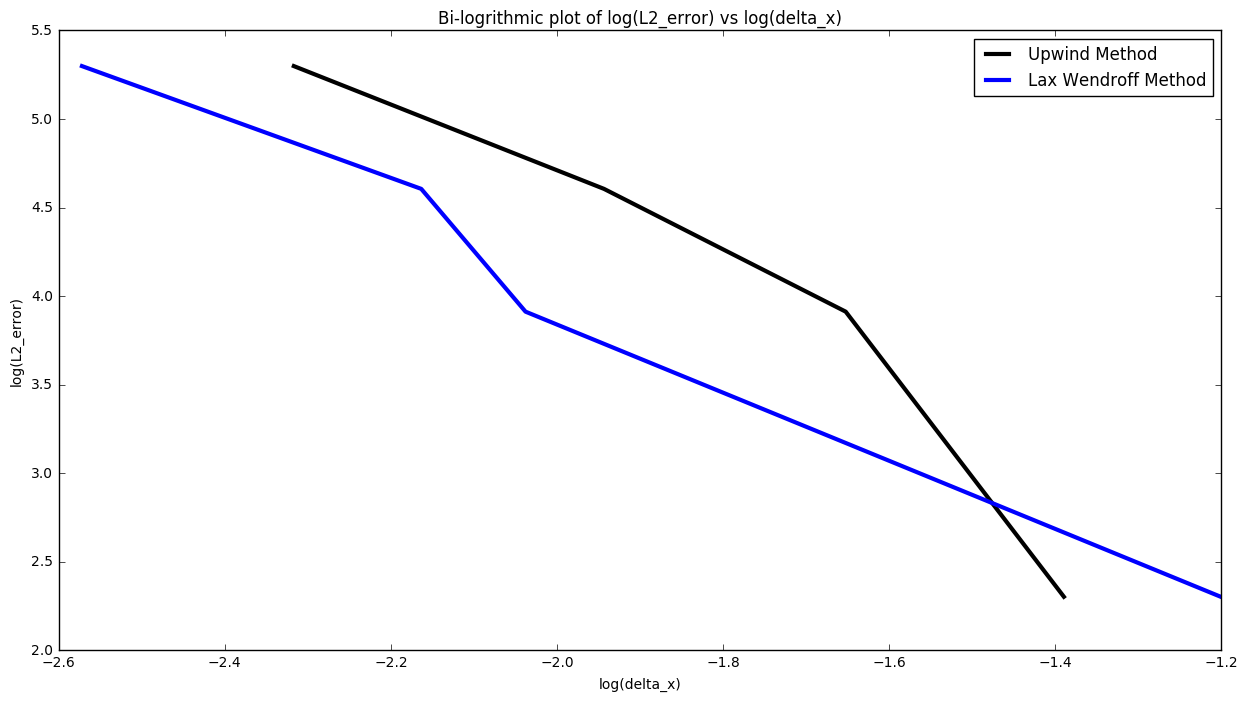

In [16]:
#Create a list of N values to loop through
divisions = [10,50,100,200,300]

# Initialise two lists to store errors in
up_error_list = []
lax_error_list =[]
for N in divisions:
    iteration=1
    T_start = 0.0
    T_25 = 0.25
    T_50 = 0.5
    T_end = 1.0

    L = 1.5
    v = 1.0

    # Define the initial condition
    def IC(x,t):
        new=x-t
        for i in range(len(new)):
            if new[i]<0.1:
                new[i]=0
            elif new[i]>0.3:
                new[i]=0
            else:
                new[i]=1
        return new

    # We dont need the usual line defining N since it is defined in our loop
    # ie. N = 200 is not necessary here

    # Define array of all grid points
    x = numpy.linspace(0,L,N)

    # Use the parameters to determine the grid spacing and set time step
    delta_x = L/float(N)
    delta_t = 0.005

    # Initialize two arrays: One for the analytical solution and one for the numerical
    # Here, the first dimension gives you the number of grid points and the second is 4
    # It is 4 to create a column for each time step, ie [0,0.25,0.5,1]

    u_ana_up_a = numpy.zeros((N,4))
    u_upwind_a = numpy.zeros((N,4))

    # Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_a and u_upwind_a
    u_ana_up_a[:,0]    = IC(x,T_start)
    u_upwind_a[:,0] = IC(x,T_start)

    # The analytical solution at the remaining time steps are saved in the relevant columns of the u_analytical array

    u_ana_up_a[:,1]    = IC(x,T_25)
    u_ana_up_a[:,2]    = IC(x,T_50)
    u_ana_up_a[:,3]    = IC(x,T_end)

    # Run the upwind function and save the results to the relevent index in the array
    u_upwind_a[:,1] = upwind(u_upwind_a[:,0],T_start,T_25,v,delta_x,delta_t)
    u_upwind_a[:,2] = upwind(u_upwind_a[:,0],T_start,T_50,v,delta_x,delta_t)
    u_upwind_a[:,3] = upwind(u_upwind_a[:,0],T_start,T_end,v,delta_x,delta_t)
    
    u_ana_lax_a = numpy.zeros((N,4))
    u_lax_a = numpy.zeros((N,4))

    # Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_a and u_upwind_a
    u_ana_lax_a[:,0]    = IC(x,T_start)
    u_lax_a[:,0] = IC(x,T_start)

    # The analytical solution at the remaining time steps are saved in the relevant columns of the u_analytical array
    u_ana_lax_a[:,1]    = IC(x,T_25)
    u_ana_lax_a[:,2]    = IC(x,T_50)
    u_ana_lax_a[:,3]    = IC(x,T_end)

    # Run the upwind function and save the results to the relevent index in the array
    u_lax_a[:,1] = lax_wendroff(u_lax_a[:,0],T_start,T_25,v,delta_x,delta_t)
    u_lax_a[:,2] = lax_wendroff(u_lax_a[:,0],T_start,T_50,v,delta_x,delta_t)
    u_lax_a[:,3] = lax_wendroff(u_lax_a[:,0],T_start,T_end,v,delta_x,delta_t)

    
    # Use the error function to calculate the error of each method at each time point
    #At t=0
    err_up_a_0 = error(u_ana_up_a[:,0],u_upwind_a[:,0],delta_x)

    #At t=.25
    err_up_a_025 = error(u_ana_up_a[:,1],u_upwind_a[:,1],delta_x)

    #At t=.5
    err_up_a_050 = error(u_ana_up_a[:,2],u_upwind_a[:,2],delta_x)

    #At t=1
    err_up_a_1 = error(u_ana_up_a[:,3],u_upwind_a[:,3],delta_x)

    up_mean = (err_up_a_0 + err_up_a_025 + err_up_a_050 + err_up_a_1)/4
    
    up_error_list.append(up_mean)
    
    err_lax_a_0 = error(u_ana_lax_a[:,0],u_lax_a[:,0],delta_x)

    #At t=.25
    err_lax_a_025 = error(u_ana_lax_a[:,1],u_lax_a[:,1],delta_x)

    #At t=.5
    err_lax_a_050 = error(u_ana_lax_a[:,2],u_lax_a[:,2],delta_x)

    #At t=1
    err_lax_a_1 = error(u_ana_lax_a[:,3],u_lax_a[:,3],delta_x)
    
    #Take the mean of errors at each time point to get an idea of the general error at current N
    lax_mean = (err_lax_a_0 + err_lax_a_025 + err_lax_a_050 + err_lax_a_1)/4
    
    lax_error_list.append(lax_mean)
    
    
    
log_divisions = numpy.log(numpy.array(divisions))

fig = plt.figure(1)
fig.set_figwidth(2.5 * fig.get_figwidth())
fig.set_figheight(2 * fig.get_figheight())
up_error_list = numpy.array(up_error_list)
lax_error_list = numpy.array(lax_error_list)
plt.plot(numpy.log(up_error_list),log_divisions,'k',linewidth=3, label = 'Upwind Method')
plt.plot(numpy.log(lax_error_list),log_divisions,'b',linewidth=3, label = 'Lax Wendroff Method')
plt.xlabel("log(delta_x)")
plt.ylabel("log(L2_error)")
plt.title("Bi-logrithmic plot of log(L2_error) vs log(delta_x)")
plt.legend()

As can be seen from the above plot, as the time steps get smaller, the error converges to 0 in both the Upwind and Lax-Wendroff schemes for example (b). This is in line with what we saw in the theroy.

## Time convergence for Upwind and Lax-Wendroff Schemes using example (a)

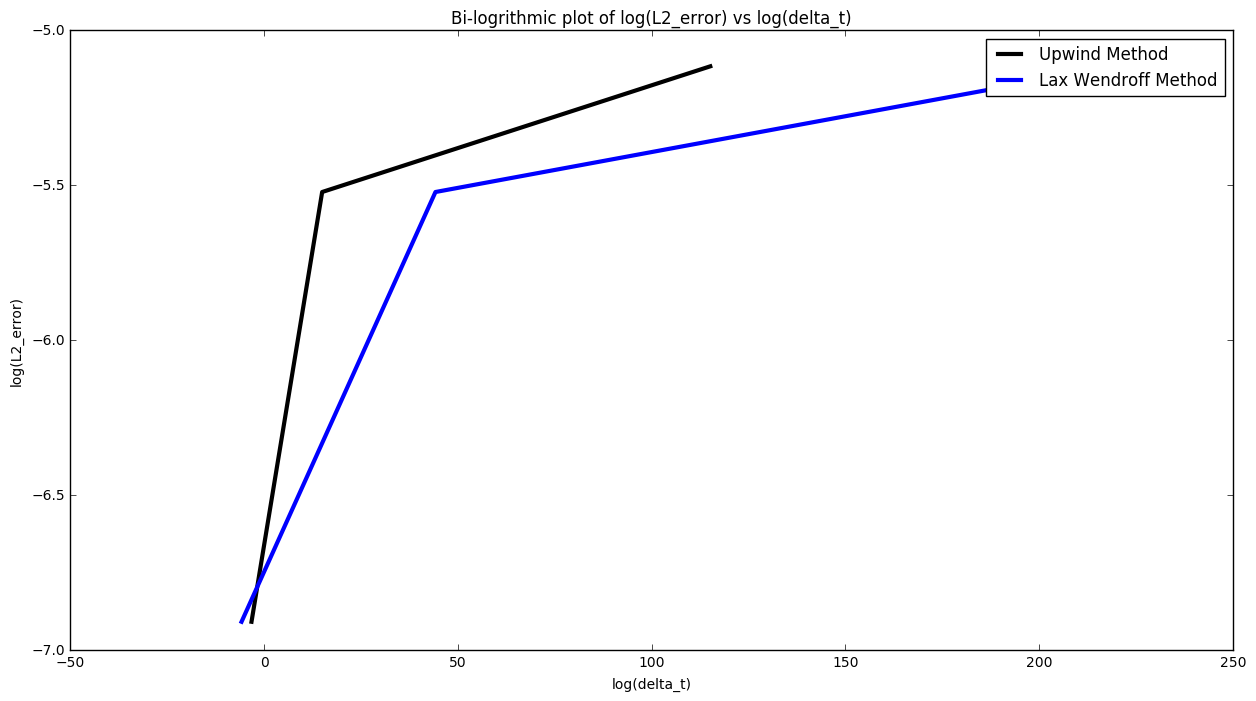

In [17]:
delta_t_list = [0.001,0.004,0.006]

log_divisions = numpy.log(numpy.array(delta_t_list))
up_error_list = []
lax_error_list =[]
for Dt in delta_t_list:
    iteration=1
    # Test script for the upwind method
    T_start = 0.0
    T_25 = 0.25
    T_50 = 0.5
    T_end = 1.0

    L = 1.5
    v = 1.0

    # Define the initial condition
    def IC(x,t):
        return numpy.exp(-10*(4*(x-t)-1)**2)

    # Number of grid points
    N = 400
    # Define array of all grid points
    x = numpy.linspace(0,L,N)

    # Use the parameters to determine the grid spacing and set time step
    delta_x = L/float(N)
    delta_t = Dt

    # Initialize two arrays: One for the analytical solution and one for the numerical
    # Here, the first dimension gives you the number of grid points and the second is 2: One for u (analytical and numerical) 
    # at time t=0.0 and one for u at time t=1.0

    u_ana_up_a    = numpy.zeros((N,4))
    u_upwind_a = numpy.zeros((N,4))

    # Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_a and u_upwind_a
    u_ana_up_a[:,0]    = IC(x,T_start)
    u_upwind_a[:,0] = IC(x,T_start)

    # The analytical solution an T_end is saved to the second column
    u_ana_up_a[:,1]    = IC(x,T_25)
    u_ana_up_a[:,2]    = IC(x,T_50)
    u_ana_up_a[:,3]    = IC(x,T_end)

    # Use your function to solve the equation and save your result
    u_upwind_a[:,1] = upwind(u_upwind_a[:,0],T_start,T_25,v,delta_x,delta_t)
    u_upwind_a[:,2] = upwind(u_upwind_a[:,0],T_start,T_50,v,delta_x,delta_t)
    u_upwind_a[:,3] = upwind(u_upwind_a[:,0],T_start,T_end,v,delta_x,delta_t)
    
    u_ana_lax_a    = numpy.zeros((N,4))
    u_lax_a = numpy.zeros((N,4))

    # Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_a and u_upwind_a
    u_ana_lax_a[:,0]    = IC(x,T_start)
    u_lax_a[:,0] = IC(x,T_start)

    # The analytical solution an T_end is saved to the second column
    u_ana_lax_a[:,1]    = IC(x,T_25)
    u_ana_lax_a[:,2]    = IC(x,T_50)
    u_ana_lax_a[:,3]    = IC(x,T_end)

    # Use your function to solve the equation and save your result
    u_lax_a[:,1] = lax_wendroff(u_lax_a[:,0],T_start,T_25,v,delta_x,delta_t)
    u_lax_a[:,2] = lax_wendroff(u_lax_a[:,0],T_start,T_50,v,delta_x,delta_t)
    u_lax_a[:,3] = lax_wendroff(u_lax_a[:,0],T_start,T_end,v,delta_x,delta_t)

    
    #Errors
    # t = 0
    err_up_a_0 = error(u_ana_up_a[:,0],u_upwind_a[:,0],delta_x)

    #At t = .25
    err_up_a_025 = error(u_ana_up_a[:,1],u_upwind_a[:,1],delta_x)

    #At t = .5
    err_up_a_050 = error(u_ana_up_a[:,2],u_upwind_a[:,2],delta_x)

    # t = 1
    err_up_a_1 = error(u_ana_up_a[:,3],u_upwind_a[:,3],delta_x)
    
    #Take the mean of errors at each time point to get an idea of the general error at current N
    up_mean = (err_up_a_0 + err_up_a_025 + err_up_a_050 + err_up_a_1)/4
    
    up_error_list.append(up_mean)
    
    # t = 0
    err_lax_a_0 = error(u_ana_lax_a[:,0],u_lax_a[:,0],delta_x)

    # t = .25
    err_lax_a_025 = error(u_ana_lax_a[:,1],u_lax_a[:,1],delta_x)

    # t = .5
    err_lax_a_050 = error(u_ana_lax_a[:,2],u_lax_a[:,2],delta_x)

    #At t = 1
    err_lax_a_1 = error(u_ana_lax_a[:,3],u_lax_a[:,3],delta_x)
    
    
    lax_mean = (err_lax_a_0 + err_lax_a_025 + err_lax_a_050 + err_lax_a_1)/4
    
    lax_error_list.append(lax_mean)
    
    
fig = plt.figure(1)
fig.set_figwidth(2.5 * fig.get_figwidth())
fig.set_figheight(2 * fig.get_figheight())
up_error_list = numpy.array(up_error_list)
lax_error_list = numpy.array(lax_error_list)
plt.plot(numpy.log(up_error_list),log_divisions,'k',linewidth=3, label = 'Upwind Method')
plt.plot(numpy.log(lax_error_list),log_divisions,'b',linewidth=3, label = 'Lax Wendroff Method')
plt.xlabel("log(delta_t)")
plt.ylabel("log(L2_error)")
plt.title("Bi-logrithmic plot of log(L2_error) vs log(delta_t)")
plt.legend()

As can be seen from the above plot, the error is lowest in both the Upwind and Lax-Wendroff schemes when the time steps converge to 0. This is in line with what we saw in the theroy. ie. the error converges to a minimum as the time steps converge to 0.

## Time convergence for Upwind and Lax-Wendroff Schemes using example (b)

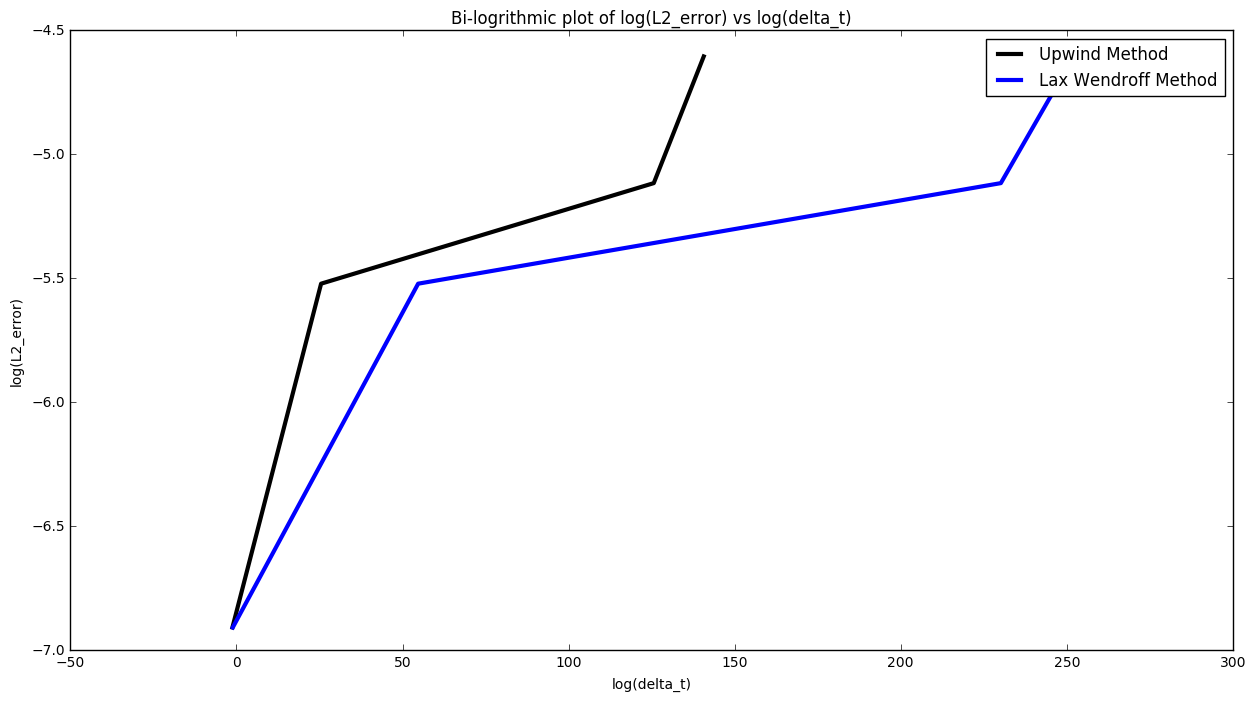

In [18]:
delta_t_list = [0.001,0.004,0.006,0.01]

log_divisions = numpy.log(numpy.array(delta_t_list))
up_error_list = []
lax_error_list =[]
for Dt in delta_t_list:
    iteration=1
    # Test script for the upwind method
    T_start = 0.0
    T_25 = 0.25
    T_50 = 0.5
    T_end = 1.0

    L = 1.5
    v = 1.0

    # Define the initial condition
    def IC(x,t):
        new=x-t
        for i in range(len(new)):
            if new[i]<0.1:
                new[i]=0
            elif new[i]>0.3:
                new[i]=0
            else:
                new[i]=1
        return new
    # Number of grid points
    N = 200

    # Define array of all grid points
    x = numpy.linspace(0,L,N)

    # Use the parameters to determine the grid spacing and set time step
    delta_x = L/float(400)
    delta_t = Dt
    # Initialize two arrays: One for the analytical solution and one for the numerical
    # Here, the first dimension gives you the number of grid points and the second is 2: One for u (analytical and numerical) 
    # at time t=0.0 and one for u at time t=1.0

    u_ana_up_b    = numpy.zeros((N,4))
    u_upwind_b = numpy.zeros((N,4))

    # Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_b and u_upwind_b
    u_ana_up_b[:,0]    = IC(x,T_start)
    u_upwind_b[:,0] = IC(x,T_start)

    # The analytical solution an T_end is saved to the second column
    u_ana_up_b[:,1]    = IC(x,T_25)
    u_ana_up_b[:,2]    = IC(x,T_50)
    u_ana_up_b[:,3]    = IC(x,T_end)

    # Use your function to solve the equation and save your result into the second column of your array u_upwind_b
    u_upwind_b[:,1] = upwind(u_upwind_b[:,0],T_start,T_25,v,delta_x,delta_t)
    u_upwind_b[:,2] = upwind(u_upwind_b[:,0],T_start,T_50,v,delta_x,delta_t)
    u_upwind_b[:,3] = upwind(u_upwind_b[:,0],T_start,T_end,v,delta_x,delta_t)
    
    u_ana_lax_b    = numpy.zeros((N,4))
    u_lax_b = numpy.zeros((N,4))

    # Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_b and u_upwind_b
    u_ana_lax_b[:,0]    = IC(x,T_start)
    u_lax_b[:,0] = IC(x,T_start)

    # The analytical solution an T_end is saved to the second column
    u_ana_lax_b[:,1]    = IC(x,T_25)
    u_ana_lax_b[:,2]    = IC(x,T_50)
    u_ana_lax_b[:,3]    = IC(x,T_end)

    # Use your function to solve the equation and save your result
    u_lax_b[:,1] = lax_wendroff(u_lax_b[:,0],T_start,T_25,v,delta_x,delta_t)
    u_lax_b[:,2] = lax_wendroff(u_lax_b[:,0],T_start,T_50,v,delta_x,delta_t)
    u_lax_b[:,3] = lax_wendroff(u_lax_b[:,0],T_start,T_end,v,delta_x,delta_t)

    
    #Calculate the L2 errors for plotting
    #  t = 0
    err_up_b_0 = error(u_ana_up_b[:,0],u_upwind_b[:,0],delta_x)

    # t = .25
    err_up_b_025 = error(u_ana_up_b[:,1],u_upwind_b[:,1],delta_x)

    # t = .5
    err_up_b_050 = error(u_ana_up_b[:,2],u_upwind_b[:,2],delta_x)

    # t = 1
    err_up_b_1 = error(u_ana_up_b[:,3],u_upwind_b[:,3],delta_x)

    up_mean = (err_up_b_0 + err_up_b_025 + err_up_b_050 + err_up_b_1)/4
    
    up_error_list.append(up_mean)
    
    err_lax_b_0 = error(u_ana_lax_b[:,0],u_lax_b[:,0],delta_x)

    # t=.25
    err_lax_b_025 = error(u_ana_lax_b[:,1],u_lax_b[:,1],delta_x)

    # t=.5
    err_lax_b_050 = error(u_ana_lax_b[:,2],u_lax_b[:,2],delta_x)

    # t=1
    err_lax_b_1 = error(u_ana_lax_b[:,3],u_lax_b[:,3],delta_x)
    
    lax_mean = (err_lax_b_0 + err_lax_b_025 + err_lax_b_050 + err_lax_b_1)/4
    
    lax_error_list.append(lax_mean)
    
    
fig = plt.figure(1)
fig.set_figwidth(2.5 * fig.get_figwidth())
fig.set_figheight(2 * fig.get_figheight())
up_error_list = numpy.array(up_error_list)
lax_error_list = numpy.array(lax_error_list)
plt.plot(numpy.log(up_error_list),log_divisions,'k',linewidth=3, label = 'Upwind Method')
plt.plot(numpy.log(lax_error_list),log_divisions,'b',linewidth=3, label = 'Lax Wendroff Method')
plt.xlabel("log(delta_t)")
plt.ylabel("log(L2_error)")
plt.title("Bi-logrithmic plot of log(L2_error) vs log(delta_t)")
plt.legend()


As can be seen from the above plot, the error is lowest in both the Upwind and Lax-Wendroff schemes when the time steps converge to 0. This is in line with what we saw in the theroy. ie. the error converges to a minimum as the time steps converge to 0.

# Q4

The implementaion in Q1 already takes into account periodic boundary conditions and so all that is left to do for Q4 is run the solver until t=5.

### Running until t=5 for upwind

In [19]:
# Test script for the upwind method
T_start = 1
T_25 = 2
T_50 = 3
T_end = 5

L = 1.5
v = 1.0

# Define the initial condition
def IC(x,t):
    return numpy.exp(-10*(4*(x-t)-1)**2)

# Number of grid points (ie. number of space partitions)
N = 200

# Define array of all grid points
x = numpy.linspace(0,L,N)

# Use the parameters to determine the grid spacing and set time step
delta_x = L/float(N)
delta_t = 0.005

# Initialize two arrays: One for the analytical solution and one for the numerical
# Here, the first dimension gives you the number of grid points and the second is 4
# It is 4 to create a column for each time step, ie [0,0.25,0.5,1]

u_ana_up_a    = numpy.zeros((N,4))
u_upwind_a = numpy.zeros((N,4))

# Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_a and u_upwind_a
# The analatical and numerical solution are identical at t=0
u_ana_up_a[:,0]    = IC(x,T_start)
u_upwind_a[:,0] = IC(x,T_start)

# The analytical solution at the remaining time steps are saved in the relevant columns of the u_analytical array
u_ana_up_a[:,1]    = IC(x,T_25)
u_ana_up_a[:,2]    = IC(x,T_50)
u_ana_up_a[:,3]    = IC(x,T_end)

# Run the upwind function and save the results to the relevent index in the array
u_upwind_a[:,1] = upwind(u_upwind_a[:,0],T_start,T_25,v,delta_x,delta_t)
u_upwind_a[:,2] = upwind(u_upwind_a[:,0],T_start,T_50,v,delta_x,delta_t)
u_upwind_a[:,3] = upwind(u_upwind_a[:,0],T_start,T_end,v,delta_x,delta_t)

At time=1 the error=0.0
At time=2 the error=0.2707621327804446
At time=3 the error=0.24687524775663727
At time=5 the error=0.21890403918819074


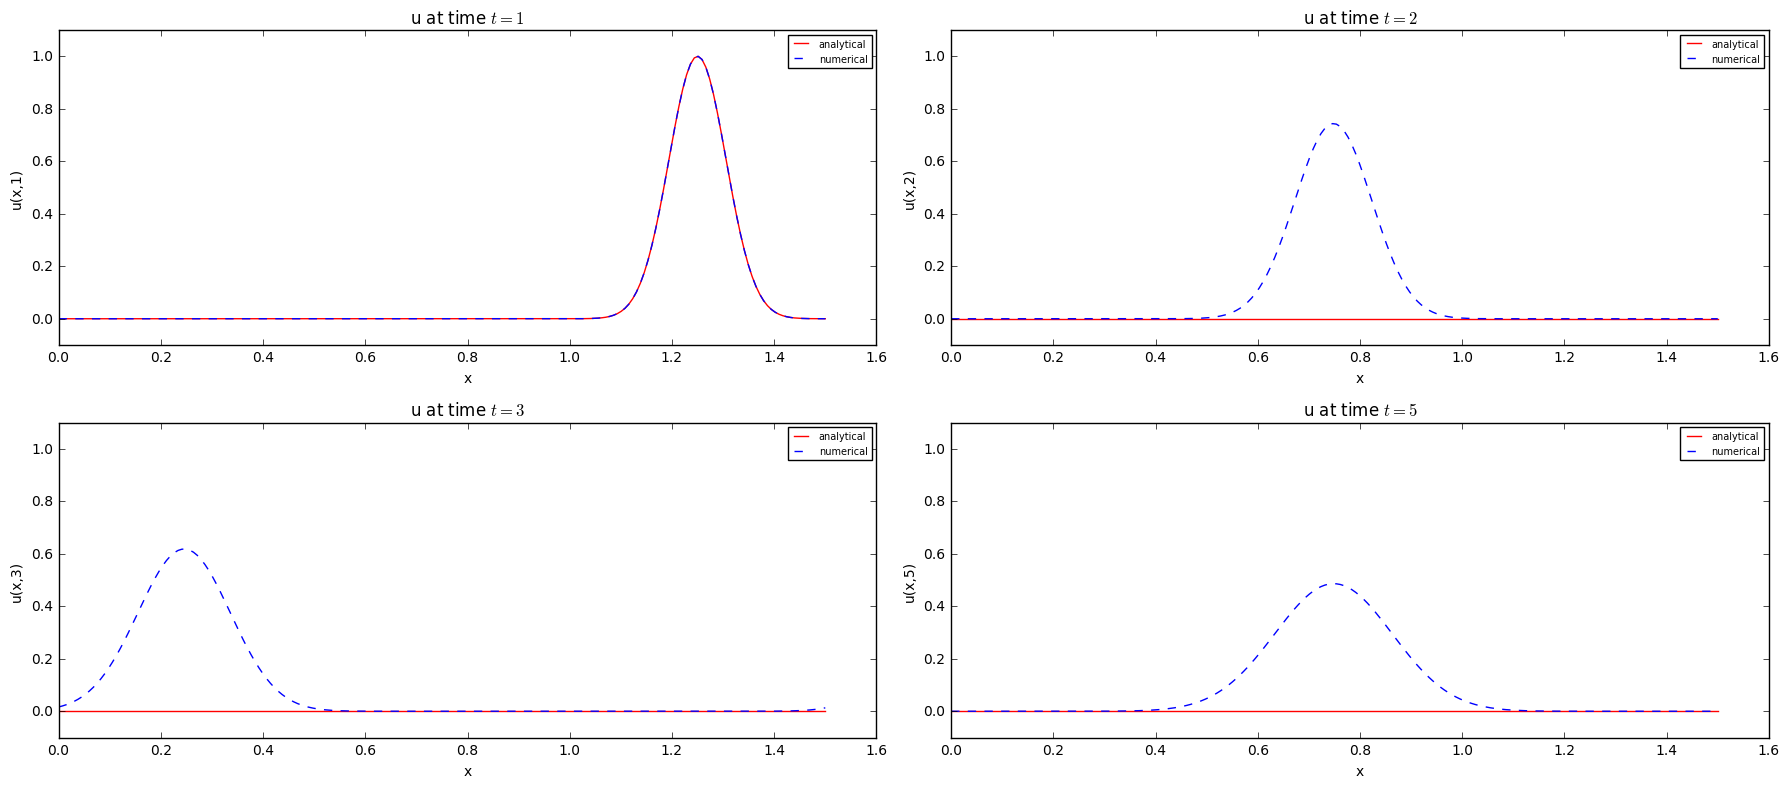

In [20]:
fig = plt.figure(1)
fig.set_figwidth(3 * fig.get_figwidth())
fig.set_figheight(2 * fig.get_figheight())

for i in range(4):
    subplt_num = 221+i
    if i==3:
        time_val = 5
    else:
        time_val = i+1
    plt.subplot(subplt_num)
    plt.tight_layout()
    plt.plot(x,u_ana_up_a[:,i],'r',label="analytical")
    plt.plot(x,u_upwind_a[:,i],'b--', label="numerical",linewidth=1)
    plt.xlabel("x")
    plt.ylabel("u(x,{})".format(time_val))
    plt.title("u at time $t={}$".format(time_val))
    plt.legend(fontsize=7)
    plt.ylim(-0.1,1.1)
    
# at times t ∈ {0, 0.25, 0.5, 1.0} compute the L2-error at those time steps
# Error function defined above
# Firstly for the initial time = 0
err_up_a_list = []
err_up_a_0 = error(u_ana_up_a[:,0],u_upwind_a[:,0],delta_x)
err_up_a_list.append(err_up_a_0)
# t = 0.25
err_up_a_025 = error(u_ana_up_a[:,1],u_upwind_a[:,1],delta_x)
err_up_a_list.append(err_up_a_025)
# t = 0.5
err_up_a_050 = error(u_ana_up_a[:,2],u_upwind_a[:,2],delta_x)
err_up_a_list.append(err_up_a_050)
# t = 1
err_up_a_1 = error(u_ana_up_a[:,3],u_upwind_a[:,3],delta_x)
err_up_a_list.append(err_up_a_1)

t_list = [1,2,3,5]

for i in range(len(err_up_a_list)):
    print('At time={} the error={}'.format(t_list[i],err_up_a_list[i]))

### Running until t=5 for lax-wendroff

In [21]:
T_start = 1
T_25 = 2
T_50 = 3
T_end = 5

L = 1.5
v = 1.0

# Define the initial condition
def IC(x,t):
    return numpy.exp(-10*(4*(x-t)-1)**2)

# Number of grid points
N = 200

# Define array of all grid points
x = numpy.linspace(0,L,N)

# Use the parameters to determine the grid spacing and set time step
delta_x = L/float(N)
delta_t = 0.005

# Initialize two arrays: One for the analytical solution and one for the numerical
# Here, the first dimension gives you the number of grid points and the second is 4
# It is 4 to create a column for each time step, ie [0,0.25,0.5,1]
u_ana_lax_a    = numpy.zeros((N,4))
u_lax_a = numpy.zeros((N,4))

# Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_a and u_upwind_a
# The analatical and numerical solution are identical at t=0
u_ana_lax_a[:,0]    = IC(x,T_start)
u_lax_a[:,0] = IC(x,T_start)

# The analytical solution at the remaining time steps are saved in the relevant columns of the u_analytical array
u_ana_lax_a[:,1]    = IC(x,T_25)
u_ana_lax_a[:,2]    = IC(x,T_50)
u_ana_lax_a[:,3]    = IC(x,T_end)

# Run the upwind function and save the results to the relevent index in the array depending on the time step
u_lax_a[:,1] = lax_wendroff(u_lax_a[:,0],T_start,T_25,v,delta_x,delta_t)
u_lax_a[:,2] = lax_wendroff(u_lax_a[:,0],T_start,T_50,v,delta_x,delta_t)
u_lax_a[:,3] = lax_wendroff(u_lax_a[:,0],T_start,T_end,v,delta_x,delta_t)



At time=1 the error=0.0
At time=2 the error=0.31351769349301767
At time=3 the error=0.31306307094037844
At time=5 the error=0.31219289642146564


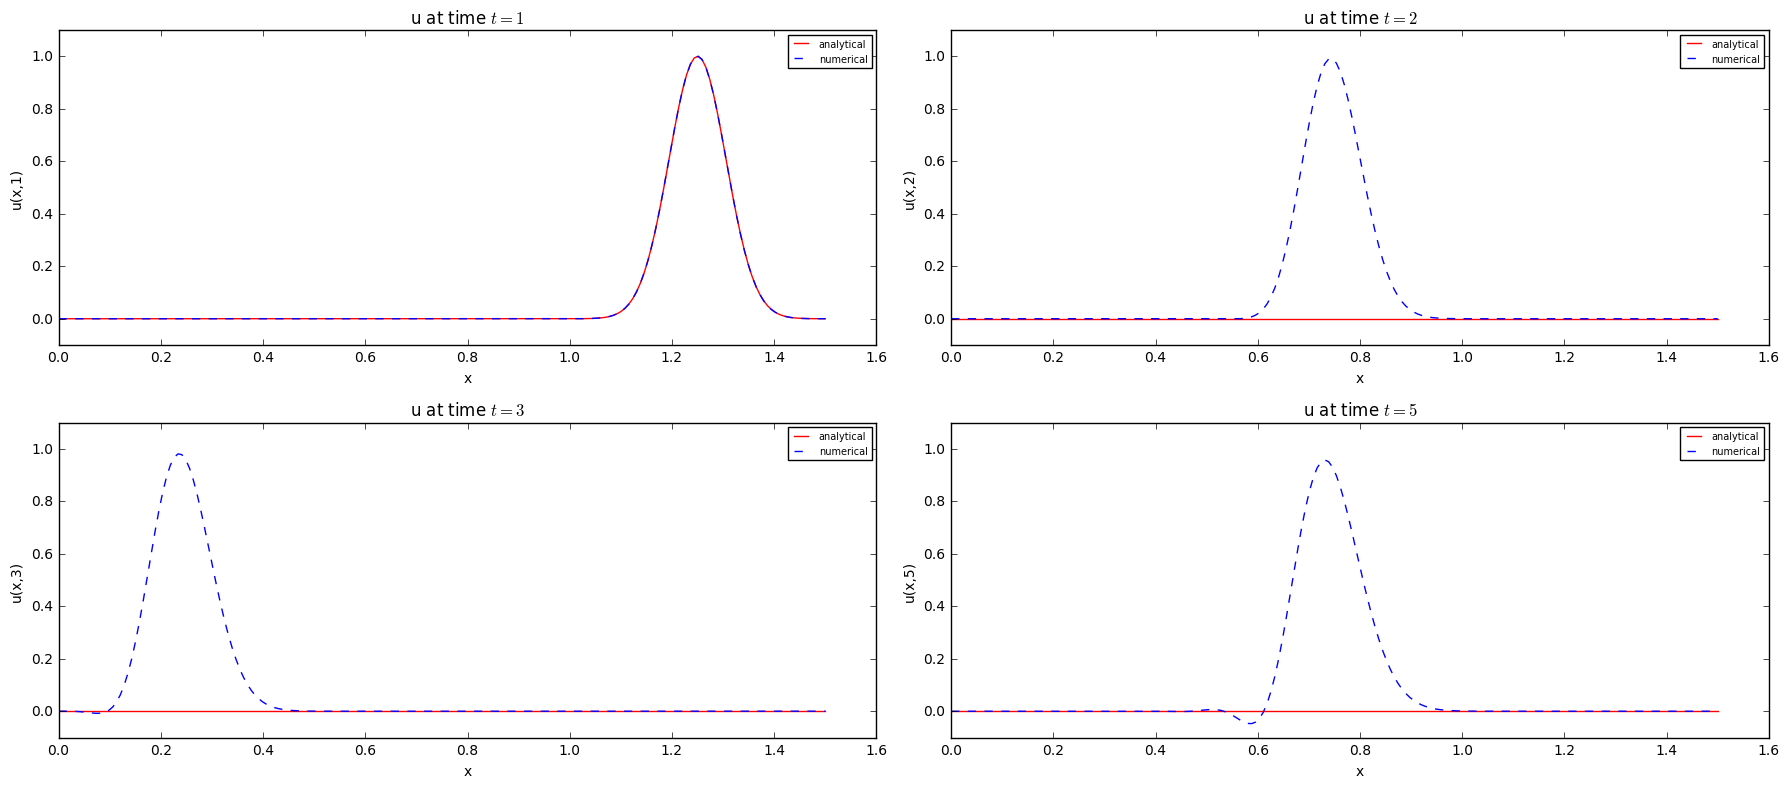

In [22]:
fig = plt.figure(1)
fig.set_figwidth(3 * fig.get_figwidth())
fig.set_figheight(2 * fig.get_figheight())

for i in range(4):
    subplt_num = 221+i
    if i==3:
        time_val = 5
    else:
        time_val = i+1
    plt.subplot(subplt_num)
    plt.tight_layout()
    plt.plot(x,u_ana_lax_a[:,i],'r',label="analytical")
    plt.plot(x,u_lax_a[:,i],'b--', label="numerical",linewidth=1)
    plt.xlabel("x")
    plt.ylabel("u(x,{})".format(time_val))
    plt.title("u at time $t={}$".format(time_val))
    plt.legend(fontsize=7)
    plt.ylim(-0.1,1.1)
    
# at times t ∈ {0, 0.25, 0.5, 1.0} compute the L2-error El2 at those time steps
# function defined above
# t = 0
err_lax_a_list = []
err_lax_a_0 = error(u_ana_lax_a[:,0],u_lax_a[:,0],delta_x)
err_lax_a_list.append(err_lax_a_0)
# t = 0.25
err_lax_a_025 = error(u_ana_lax_a[:,1],u_lax_a[:,1],delta_x)
err_lax_a_list.append(err_lax_a_025)
# t = 0.5
err_lax_a_050 = error(u_ana_lax_a[:,2],u_lax_a[:,2],delta_x)
err_lax_a_list.append(err_lax_a_050)
# t = 1
err_lax_a_1 = error(u_ana_lax_a[:,3],u_lax_a[:,3],delta_x)
err_lax_a_list.append(err_lax_a_1)

t_list = [1,2,3,5]

for i in range(len(err_lax_a_list)):
    print('At time={} the error={}'.format(t_list[i],err_lax_a_list[i]))



It is clear to see from the plots, in both the upwind and lax wendroff cases, that the solver becomes hugely less accurate as $t$ moves away from 0 and at $t=2,3,5$ the analytical solution is not even depicted on the graph it is so far off.

## Part (b)

(B) upwind

In [23]:

T_start = 1
T_25 = 2
T_50 = 3
T_end = 5

L = 1.5
v = 1.0

# Define the initial condition
def IC(x,t):
    new=x-t
    for i in range(len(new)):
        if new[i]<0.1:
            new[i]=0
        elif new[i]>0.3:
            new[i]=0
        else:
            new[i]=1
    return new

# Number of grid points
N = 200

# Define array of all grid points
x = numpy.linspace(0,L,N)

# Use the parameters to determine the grid spacing and set time step
delta_x = L/float(N)
delta_t = 0.005

# Initialize two arrays: One for the analytical solution and one for the numerical
# Here, the first dimension gives you the number of grid points and the second is 4
# It is 4 to create a column for each time step, ie [0,0.25,0.5,1]

u_ana_up_b    = numpy.zeros((N,4))
u_upwind_b = numpy.zeros((N,4))

# Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_b and u_upwind_b
u_ana_up_b[:,0]    = IC(x,T_start)
u_upwind_b[:,0] = IC(x,T_start)

# The analytical solution at the remaining time steps are saved in the relevant columns of the u_analytical array
u_ana_up_b[:,1]    = IC(x,T_25)
u_ana_up_b[:,2]    = IC(x,T_50)
u_ana_up_b[:,3]    = IC(x,T_end)

# Run the upwind function and save the results to the relevent index in the array
u_upwind_b[:,1] = upwind(u_upwind_b[:,0],T_start,T_25,v,delta_x,delta_t)
u_upwind_b[:,2] = upwind(u_upwind_b[:,0],T_start,T_50,v,delta_x,delta_t)
u_upwind_b[:,3] = upwind(u_upwind_b[:,0],T_start,T_end,v,delta_x,delta_t)

At time=1 the error=0.0
At time=2 the error=0.3823740812165892
At time=3 the error=0.3525948429876247
At time=5 the error=0.315177833670445


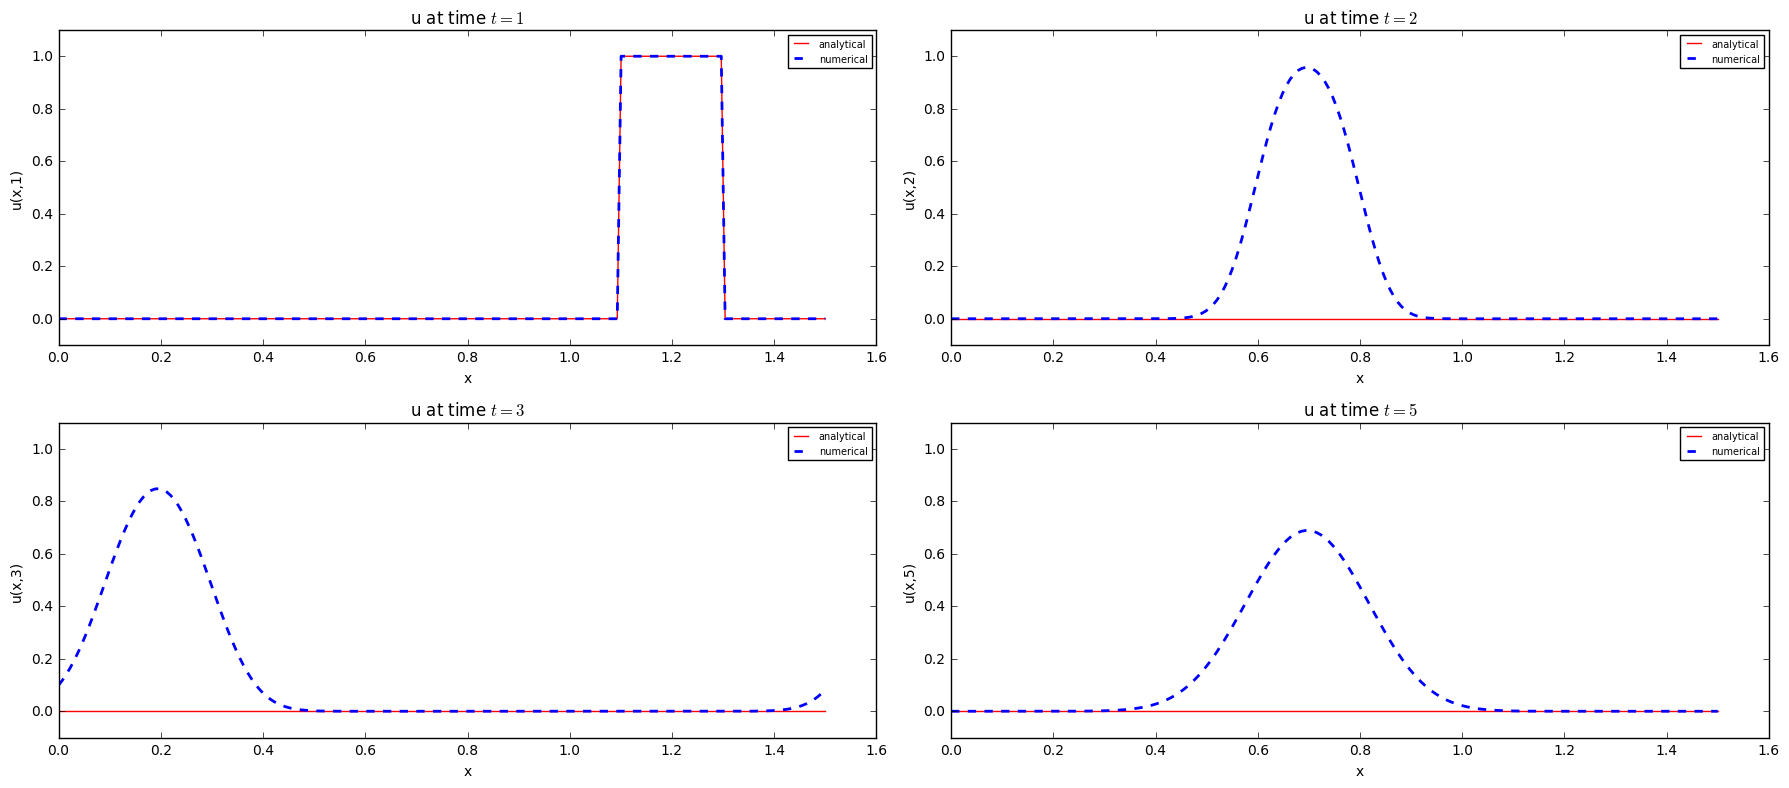

In [24]:
fig = plt.figure(1)
fig.set_figwidth(3 * fig.get_figwidth())
fig.set_figheight(2 * fig.get_figheight())

for i in range(4):
    subplt_num = 221+i
    if i==3:
        time_val = 5
    else:
        time_val = i+1
    plt.subplot(subplt_num)
    plt.tight_layout()
    plt.plot(x,u_ana_up_b[:,i],'r',label="analytical")
    plt.plot(x,u_upwind_b[:,i],'b--', label="numerical",linewidth=2)
    plt.xlabel("x")
    plt.ylabel("u(x,{})".format(time_val))
    plt.title("u at time $t={}$".format(time_val))
    plt.legend(fontsize=7)
    plt.ylim(-0.1,1.1)
    
# at times t ∈ {0, 0.25, 0.5, 1.0} compute the L2-error El2 at those time steps
# function defined above
#At t=0
err_up_b_list = []
err_up_b_0 = error(u_ana_up_b[:,0],u_upwind_b[:,0],delta_x)
err_up_b_list.append(err_up_b_0)
#At t=.25
err_up_b_025 = error(u_ana_up_b[:,1],u_upwind_b[:,1],delta_x)
err_up_b_list.append(err_up_b_025)
#At t=.5
err_up_b_050 = error(u_ana_up_b[:,2],u_upwind_b[:,2],delta_x)
err_up_b_list.append(err_up_b_050)
#At t=1
err_up_b_1 = error(u_ana_up_b[:,3],u_upwind_b[:,3],delta_x)
err_up_b_list.append(err_up_b_1)

t_list = [1,2,3,5]

for i in range(len(err_up_b_list)):
    print('At time={} the error={}'.format(t_list[i],err_up_b_list[i]))




(B) lax-wendroff

In [25]:
T_start = 1
T_25 = 2
T_50 = 3
T_end = 5

L = 1.5
v = 1.0

# Define the initial condition
def IC(x,t):
    new=x-t
    for i in range(len(new)):
        if new[i]<0.1:
            new[i]=0
        elif new[i]>0.3:
            new[i]=0
        else:
            new[i]=1
    return new

# Number of grid points
N = 200

# Define array of all grid points
x = numpy.linspace(0,L,N)

# Use the parameters to determine the grid spacing and set time step
delta_x = L/float(N)
delta_t = 0.005

# Initialize two arrays: One for the analytical solution and one for the numerical
# Here, the first dimension gives you the number of grid points and the second is 4
# It is 4 to create a column for each time step, ie [0,0.25,0.5,1]
u_ana_lax_b    = numpy.zeros((N,4))
u_lax_b = numpy.zeros((N,4))

# Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_a and u_upwind_a
u_ana_lax_b[:,0]    = IC(x,T_start)
u_lax_b[:,0] = IC(x,T_start)

# The analytical solution at the remaining time steps are saved in the relevant columns of the u_analytical array

u_ana_lax_b[:,1]    = IC(x,T_25)
u_ana_lax_b[:,2]    = IC(x,T_50)
u_ana_lax_b[:,3]    = IC(x,T_end)

# Run the upwind function and save the results to the relevent index in the array
u_lax_b[:,1] = lax_wendroff(u_lax_b[:,0],T_start,T_25,v,delta_x,delta_t)
u_lax_b[:,2] = lax_wendroff(u_lax_b[:,0],T_start,T_50,v,delta_x,delta_t)
u_lax_b[:,3] = lax_wendroff(u_lax_b[:,0],T_start,T_end,v,delta_x,delta_t)

At time=1 the error=0.0
At time=2 the error=0.4379737701657192
At time=3 the error=0.4355485673450913
At time=5 the error=0.4326508053288394


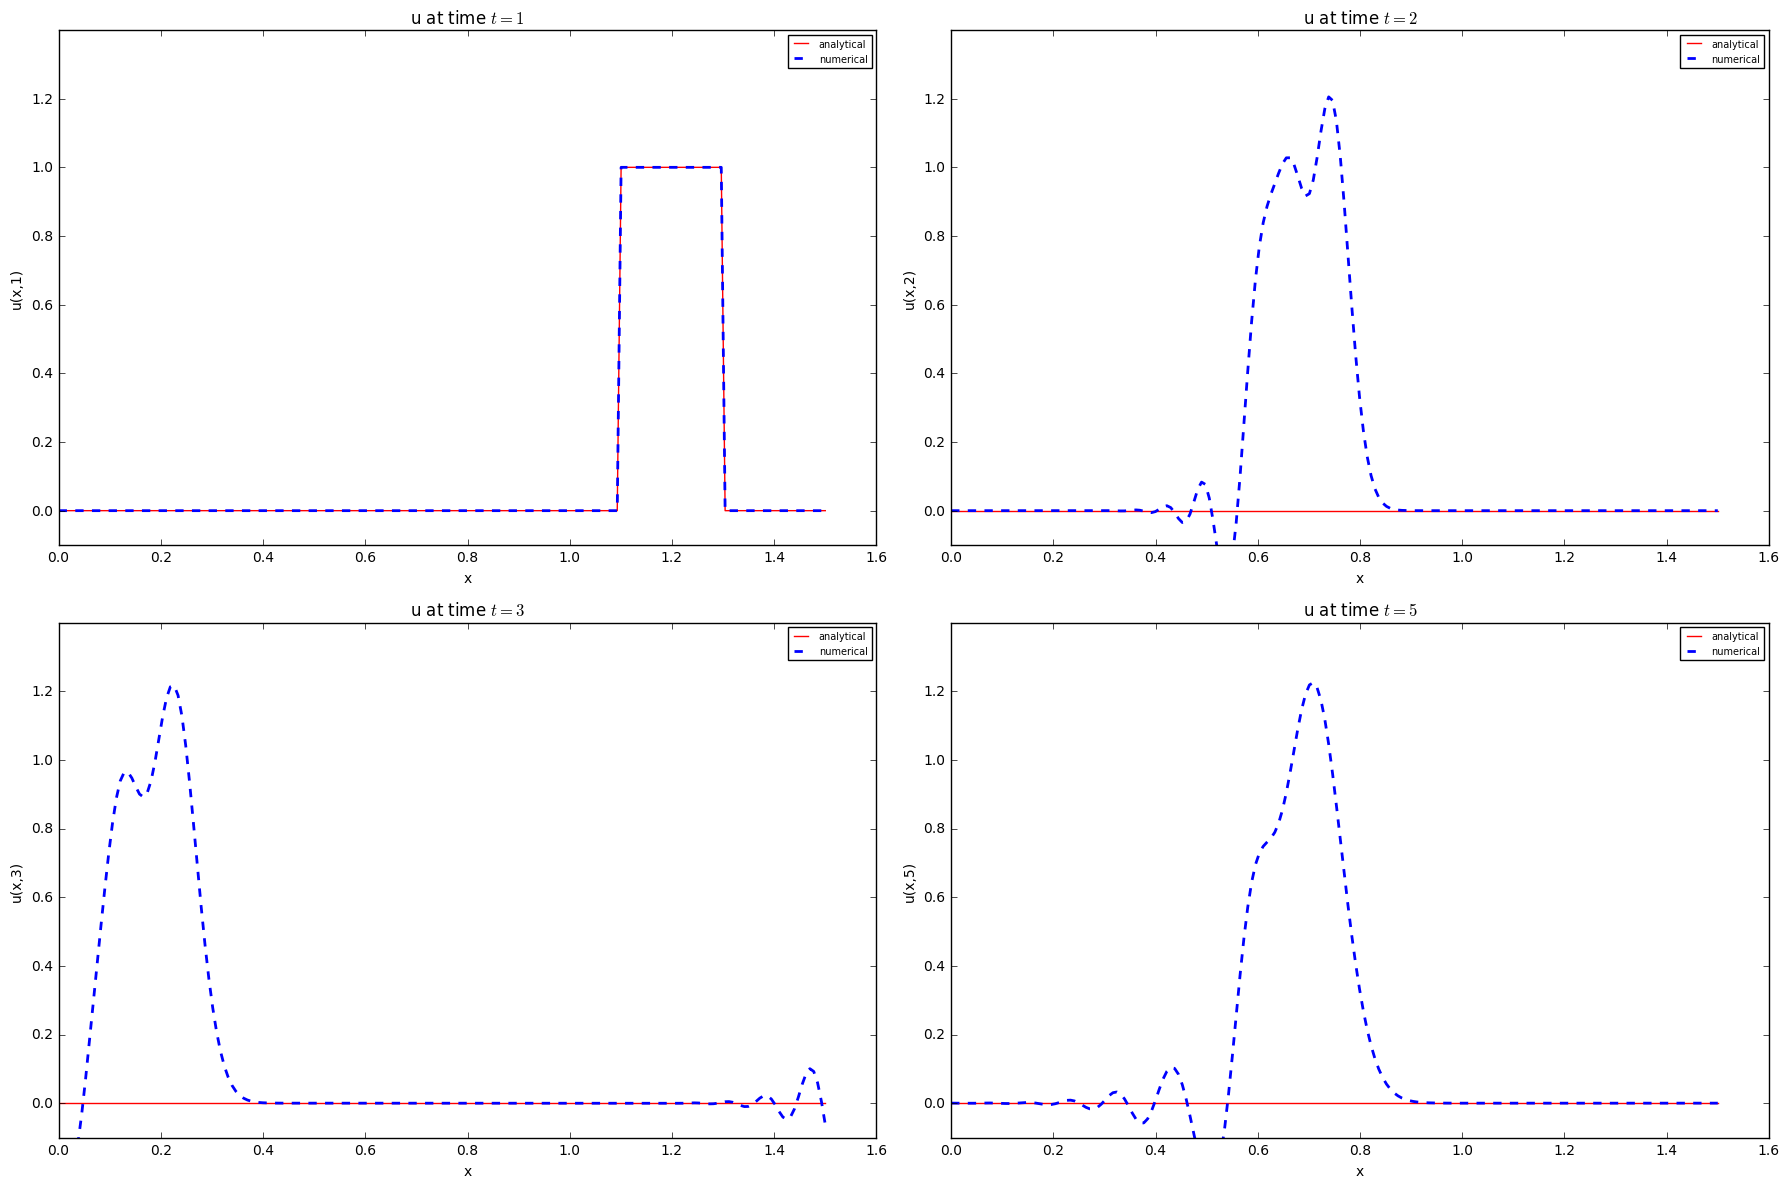

In [26]:
fig = plt.figure(1)
fig.set_figwidth(3 * fig.get_figwidth())
fig.set_figheight(3 * fig.get_figheight())

for i in range(4):
    subplt_num = 221+i
    if i==3:
        time_val = 5
    else:
        time_val = i+1
    plt.subplot(subplt_num)
    plt.tight_layout()
    plt.plot(x,u_ana_lax_b[:,i],'r',label="analytical")
    plt.plot(x,u_lax_b[:,i],'b--', label="numerical",linewidth=2)
    plt.xlabel("x")
    plt.ylabel("u(x,{})".format(time_val))
    plt.title("u at time $t={}$".format(time_val))
    plt.legend(fontsize=7)
    plt.ylim(-0.1,1.4)
    
# at times t ∈ {0, 0.25, 0.5, 1.0} compute the L2-error El2 at those time steps
# function defined above
#At t=0
err_lax_b_list = []
err_lax_b_0 = error(u_ana_lax_b[:,0],u_lax_b[:,0],delta_x)
err_lax_b_list.append(err_lax_b_0)
#At t=.25
err_lax_b_025 = error(u_ana_lax_b[:,1],u_lax_b[:,1],delta_x)
err_lax_b_list.append(err_lax_b_025)
#At t=.5
err_lax_b_050 = error(u_ana_lax_b[:,2],u_lax_b[:,2],delta_x)
err_lax_b_list.append(err_lax_b_050)
#At t=1
err_lax_b_1 = error(u_ana_lax_b[:,3],u_lax_b[:,3],delta_x)
err_lax_b_list.append(err_lax_b_1)

t_list = [1,2,3,5]

for i in range(len(err_lax_b_list)):
    print('At time={} the error={}'.format(t_list[i],err_lax_b_list[i]))




Similarly for case $(b)$ it is clear to see from the plots, in both the upwind and lax wendroff cases, that the solver becomes hugely less accurate as $t$ moves away from 0 and at $t=2,3,5$ the analytical solution is not even depicted on the graph it is so far off.

# Q5

(a) (i)

In [27]:
# Test script for the upwind method
T_start = 0.0
T_25 = 0.25
T_50 = 0.5
T_end = 1.0

L = 1.5
v = 1.0

# Define the initial condition
def IC(x,t):
    return numpy.exp(-10*(4*(x-t)-1)**2) + t*numpy.sin(2*(x-t))**2

# Number of grid points (ie. number of space partitions)
N = 200

# Define array of all grid points
x = numpy.linspace(0,L,N)

# Use the parameters to determine the grid spacing and set time step
delta_x = L/float(N)
delta_t = 0.005

# Initialize two arrays: One for the analytical solution and one for the numerical
# Here, the first dimension gives you the number of grid points and the second is 4
# It is 4 to create a column for each time step, ie [0,0.25,0.5,1]

u_ana_up_a    = numpy.zeros((N,4))
u_upwind_a = numpy.zeros((N,4))

# Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_a and u_upwind_a
# The analatical and numerical solution are identical at t=0
u_ana_up_a[:,0]    = IC(x,T_start)
u_upwind_a[:,0] = IC(x,T_start)

# The analytical solution at the remaining time steps are saved in the relevant columns of the u_analytical array
u_ana_up_a[:,1]    = IC(x,T_25)
u_ana_up_a[:,2]    = IC(x,T_50)
u_ana_up_a[:,3]    = IC(x,T_end)

# Run the upwind function and save the results to the relevent index in the array
u_upwind_a[:,1] = upwind(u_upwind_a[:,0],T_start,T_25,v,delta_x,delta_t)
u_upwind_a[:,2] = upwind(u_upwind_a[:,0],T_start,T_50,v,delta_x,delta_t)
u_upwind_a[:,3] = upwind(u_upwind_a[:,0],T_start,T_end,v,delta_x,delta_t)

At time=0 the error=0.0
At time=0.25 the error=0.19151540858919625
At time=0.5 the error=0.3718739986607801
At time=1 the error=0.7421636007459927


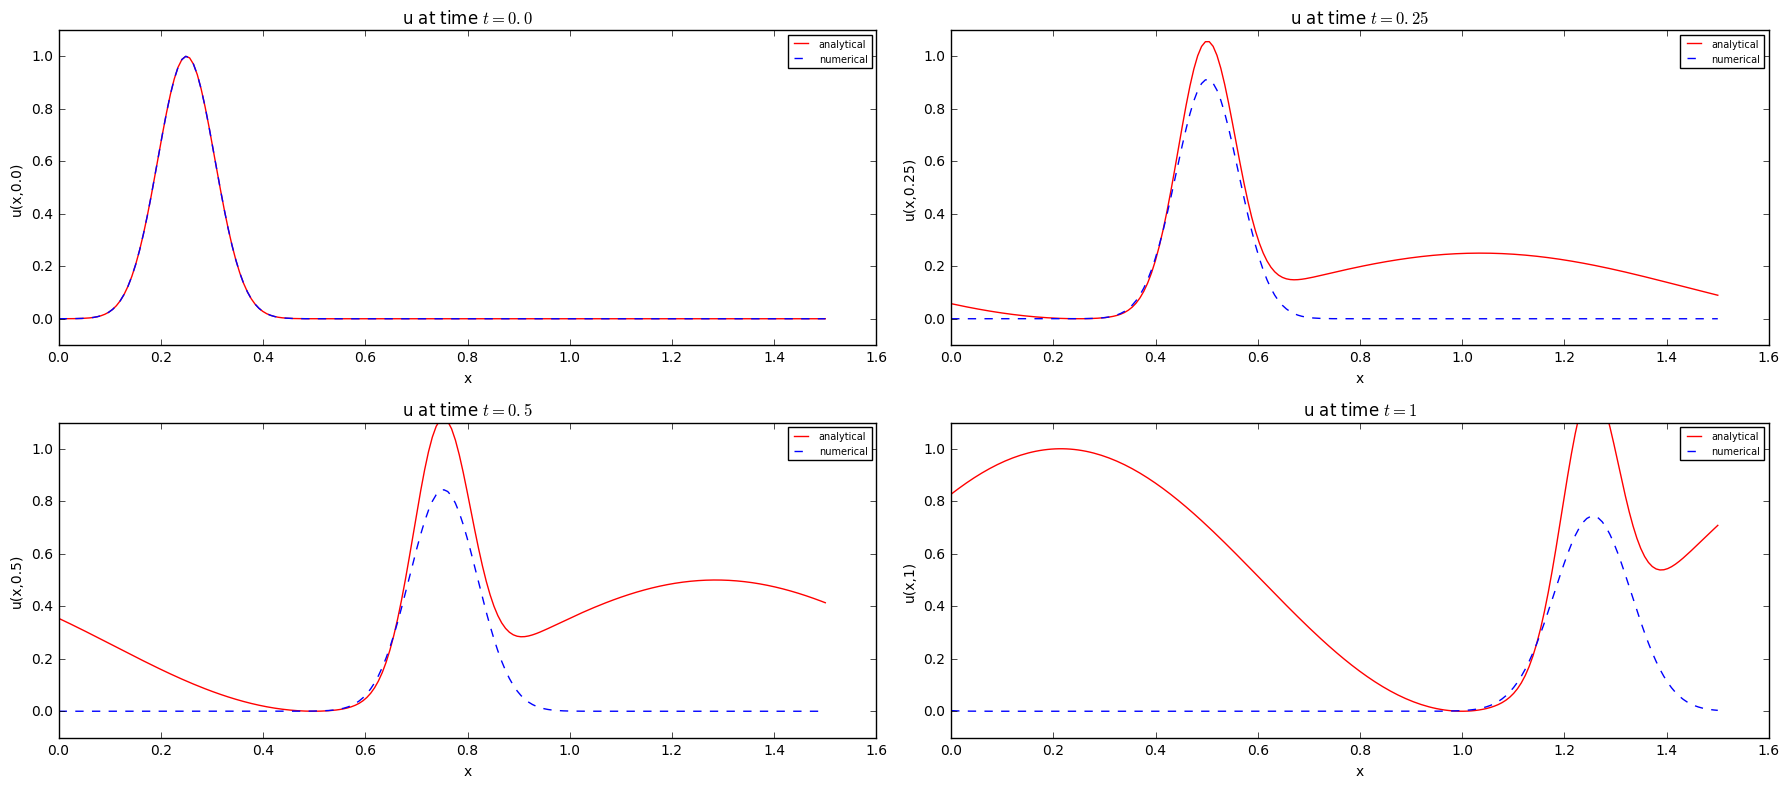

In [28]:
fig = plt.figure(1)
fig.set_figwidth(3 * fig.get_figwidth())
fig.set_figheight(2 * fig.get_figheight())

for i in range(4):
    subplt_num = 221+i
    if i==3:
        time_val = 1
    else:
        time_val = i/4
    plt.subplot(subplt_num)
    plt.tight_layout()
    plt.plot(x,u_ana_up_a[:,i],'r',label="analytical")
    plt.plot(x,u_upwind_a[:,i],'b--', label="numerical",linewidth=1)
    plt.xlabel("x")
    plt.ylabel("u(x,{})".format(time_val))
    plt.title("u at time $t={}$".format(time_val))
    plt.legend(fontsize=7)
    plt.ylim(-0.1,1.1)
    
# at times t ∈ {0, 0.25, 0.5, 1.0} compute the L2-error at those time steps
# Error function defined above
# Firstly for the initial time = 0
err_up_a_list = []
err_up_a_0 = error(u_ana_up_a[:,0],u_upwind_a[:,0],delta_x)
err_up_a_list.append(err_up_a_0)
# t = 0.25
err_up_a_025 = error(u_ana_up_a[:,1],u_upwind_a[:,1],delta_x)
err_up_a_list.append(err_up_a_025)
# t = 0.5
err_up_a_050 = error(u_ana_up_a[:,2],u_upwind_a[:,2],delta_x)
err_up_a_list.append(err_up_a_050)
# t = 1
err_up_a_1 = error(u_ana_up_a[:,3],u_upwind_a[:,3],delta_x)
err_up_a_list.append(err_up_a_1)

t_list = [0,0.25,0.5,1]

for i in range(len(err_up_a_list)):
    print('At time={} the error={}'.format(t_list[i],err_up_a_list[i]))

(a)(ii)

In [29]:
T_start = 0.0
T_25 = 0.25
T_50 = 0.5
T_end = 1.0

L = 1.5
v = 1.0

# Define the initial condition
def IC(x,t):
    return numpy.exp(-10*(4*(x-t)-1)**2) + t*numpy.sin(2*(x-t))**2

# Number of grid points
N = 200

# Define array of all grid points
x = numpy.linspace(0,L,N)

# Use the parameters to determine the grid spacing and set time step
delta_x = L/float(N)
delta_t = 0.005

# Initialize two arrays: One for the analytical solution and one for the numerical
# Here, the first dimension gives you the number of grid points and the second is 4
# It is 4 to create a column for each time step, ie [0,0.25,0.5,1]
u_ana_lax_a    = numpy.zeros((N,4))
u_lax_a = numpy.zeros((N,4))

# Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_a and u_upwind_a
# The analatical and numerical solution are identical at t=0
u_ana_lax_a[:,0]    = IC(x,T_start)
u_lax_a[:,0] = IC(x,T_start)

# The analytical solution at the remaining time steps are saved in the relevant columns of the u_analytical array
u_ana_lax_a[:,1]    = IC(x,T_25)
u_ana_lax_a[:,2]    = IC(x,T_50)
u_ana_lax_a[:,3]    = IC(x,T_end)

# Run the upwind function and save the results to the relevent index in the array depending on the time step
u_lax_a[:,1] = lax_wendroff(u_lax_a[:,0],T_start,T_25,v,delta_x,delta_t)
u_lax_a[:,2] = lax_wendroff(u_lax_a[:,0],T_start,T_50,v,delta_x,delta_t)
u_lax_a[:,3] = lax_wendroff(u_lax_a[:,0],T_start,T_end,v,delta_x,delta_t)

At time=0 the error=0.0
At time=0.25 the error=0.1901566536391251
At time=0.5 the error=0.3696885483291885
At time=1 the error=0.739371094473433


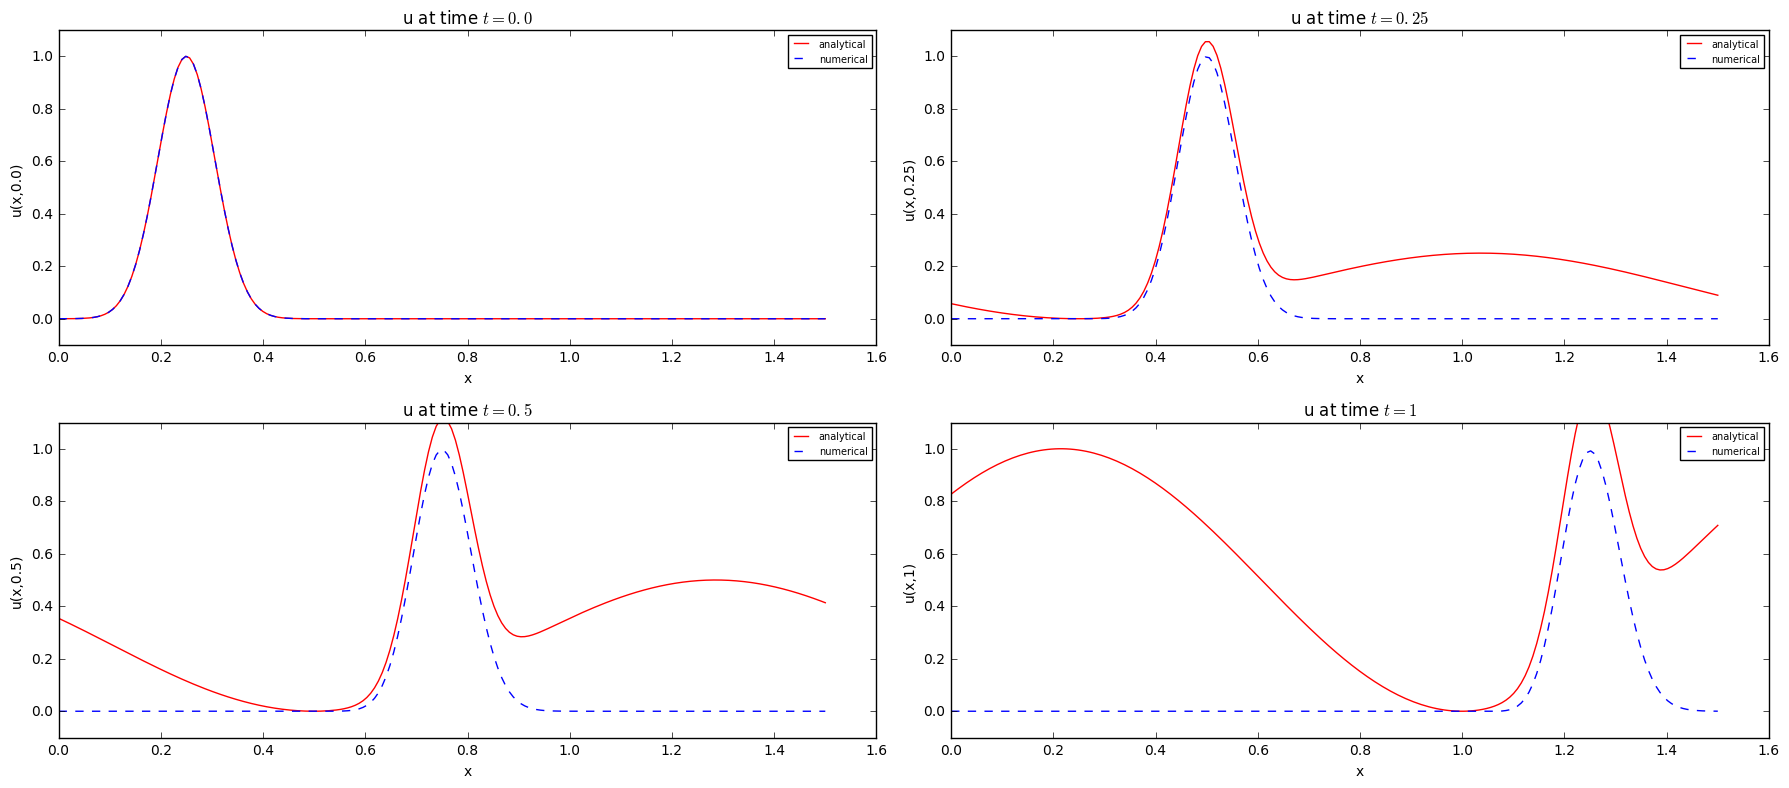

In [30]:
fig = plt.figure(1)
fig.set_figwidth(3 * fig.get_figwidth())
fig.set_figheight(2 * fig.get_figheight())

for i in range(4):
    subplt_num = 221+i
    if i==3:
        time_val = 1
    else:
        time_val = i/4
    plt.subplot(subplt_num)
    plt.tight_layout()
    plt.plot(x,u_ana_lax_a[:,i],'r',label="analytical")
    plt.plot(x,u_lax_a[:,i],'b--', label="numerical",linewidth=1)
    plt.xlabel("x")
    plt.ylabel("u(x,{})".format(time_val))
    plt.title("u at time $t={}$".format(time_val))
    plt.legend(fontsize=7)
    plt.ylim(-0.1,1.1)
    
# at times t ∈ {0, 0.25, 0.5, 1.0} compute the L2-error El2 at those time steps
# function defined above
# t = 0
err_lax_a_list = []
err_lax_a_0 = error(u_ana_lax_a[:,0],u_lax_a[:,0],delta_x)
err_lax_a_list.append(err_lax_a_0)
# t = 0.25
err_lax_a_025 = error(u_ana_lax_a[:,1],u_lax_a[:,1],delta_x)
err_lax_a_list.append(err_lax_a_025)
# t = 0.5
err_lax_a_050 = error(u_ana_lax_a[:,2],u_lax_a[:,2],delta_x)
err_lax_a_list.append(err_lax_a_050)
# t = 1
err_lax_a_1 = error(u_ana_lax_a[:,3],u_lax_a[:,3],delta_x)
err_lax_a_list.append(err_lax_a_1)

t_list = [0,0.25,0.5,1]

for i in range(len(err_lax_a_list)):
    print('At time={} the error={}'.format(t_list[i],err_lax_a_list[i]))



When the extra g(x) term is added, the funciton becomes more wavy and the numerical scheme has a much harder time following the new complexity of the function.

# Extra out of interest
## Testing instability when $\frac{\Delta t}{\Delta x}<1$

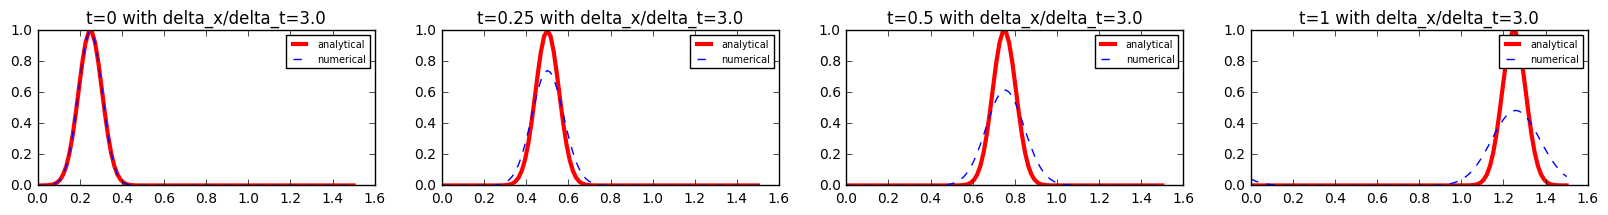

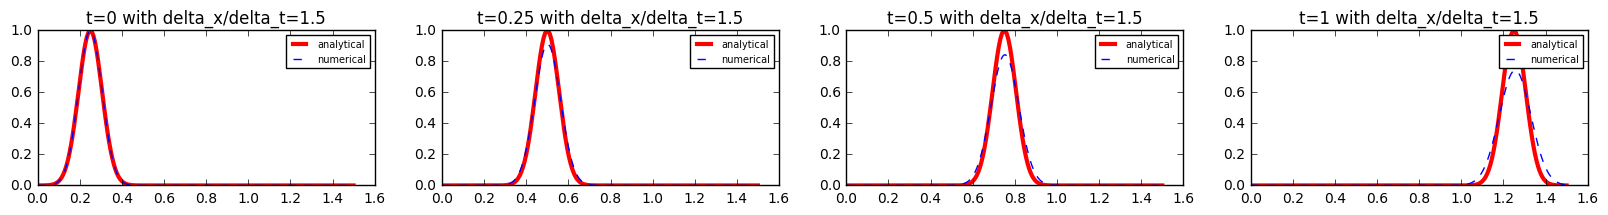

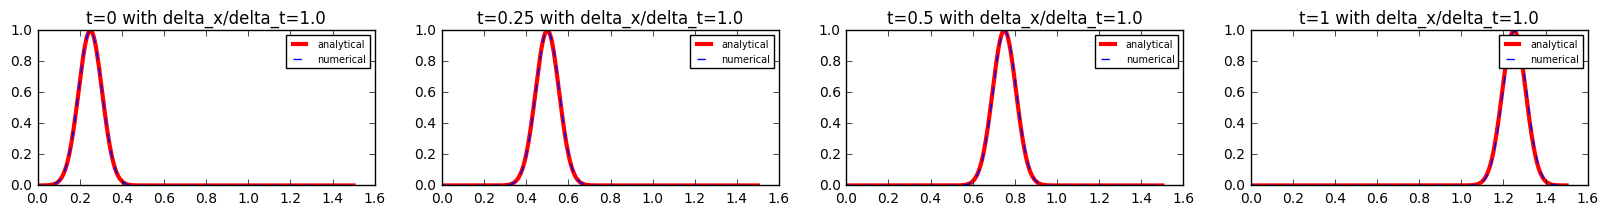

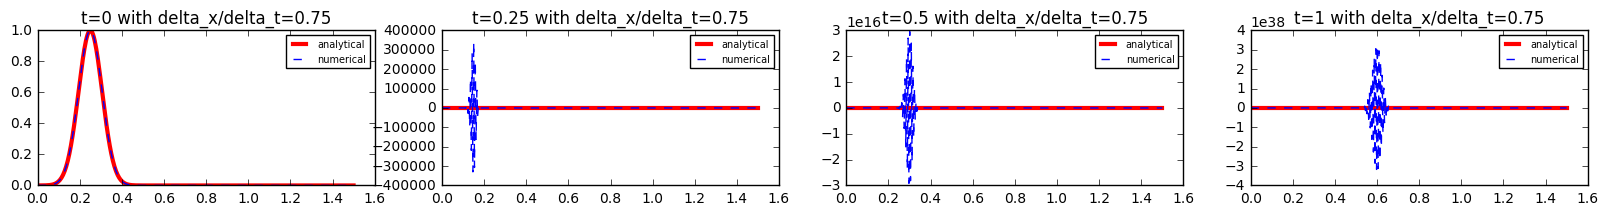

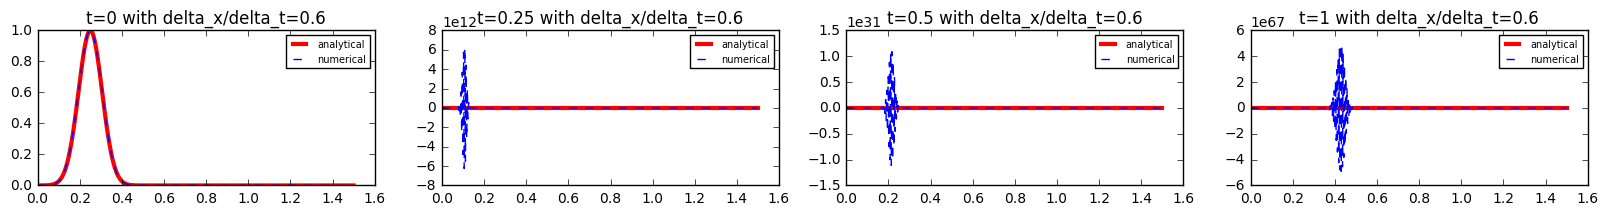

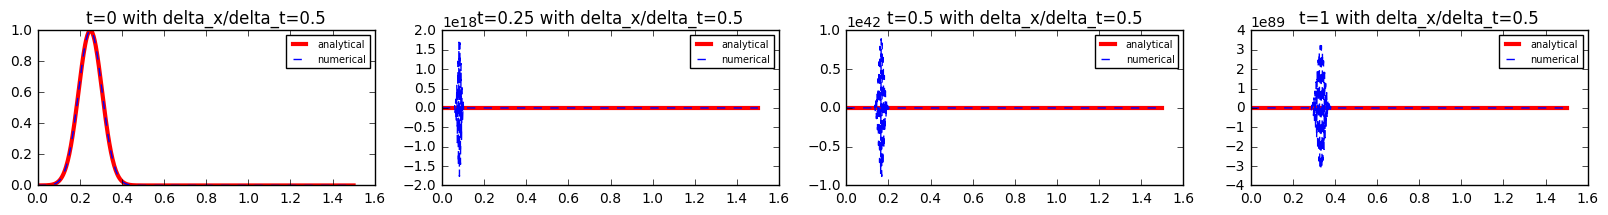

In [31]:
divisions = [100,200,300,400,500,600]
for N in divisions:
    iteration=1
    # Test script for the upwind method
    T_start = 0.0
    T_25 = 0.25
    T_50 = 0.5
    T_end = 1.0

    L = 1.5
    v = 1.0

    # Define the initial condition
    def IC(x,t):
        return numpy.exp(-10*(4*(x-t)-1)**2)

    # Number of grid points
    #N = 200

    # Define array of all grid points
    x = numpy.linspace(0,L,N)

    # Use the parameters to determine the grid spacing and set time step
    delta_x = L/float(N)
    delta_t = 0.005

    # Initialize two arrays: One for the analytical solution and one for the numerical
    # Here, the first dimension gives you the number of grid points and the second is 2: One for u (analytical and numerical) 
    # at time t=0.0 and one for u at time t=1.0

    u_ana_up_a    = numpy.zeros((N,4))
    u_upwind_a = numpy.zeros((N,4))

    # Evaluate the initial condition at time t=0.0 and save the result in the first colums --> [:,0] of the arrays u_ana_up_a and u_upwind_a
    u_ana_up_a[:,0]    = IC(x,T_start)
    u_upwind_a[:,0] = IC(x,T_start)

    u_ana_up_a[:,1]    = IC(x,T_25)
    u_ana_up_a[:,2]    = IC(x,T_50)
    u_ana_up_a[:,3]    = IC(x,T_end)

    u_upwind_a[:,1] = upwind(u_upwind_a[:,0],T_start,T_25,v,delta_x,delta_t)
    u_upwind_a[:,2] = upwind(u_upwind_a[:,0],T_start,T_50,v,delta_x,delta_t)
    u_upwind_a[:,3] = upwind(u_upwind_a[:,0],T_start,T_end,v,delta_x,delta_t)
    
    
    fig, axs = plt.subplots(1,4, figsize=(20, 2), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 1, wspace=0.2)

    axs = axs.ravel()
    title_division = divisions[i]
    for i in range(4):
        if i==0:
            title = "t=0 with delta_x/delta_t="+str(delta_x/delta_t)
        if i==1:
            title = "t=0.25 with delta_x/delta_t="+str(delta_x/delta_t)

        if i==2:
            title = "t=0.5 with delta_x/delta_t="+str(delta_x/delta_t)

        if i==3:
            title = "t=1 with delta_x/delta_t="+str(delta_x/delta_t)

        axs[i].plot(x,u_ana_up_a[:,i],'r',label="analytical",linewidth=3)
        axs[i].plot(x,u_upwind_a[:,i],'b--', label="numerical",linewidth=1)
        axs[i].set_title(title)
        axs[i].legend(fontsize=7)
    
    iteration+=1

From the above plots we can see that the numerical solution blows up when $\frac{\Delta x}{\Delta t}$ drops to below 1